In [1]:
### Laboratorios 14 - Diagrama de dispersión

In [2]:
### Tarea 106 - Diagrama de dispersión para la edad vs. la satisfacción laboral

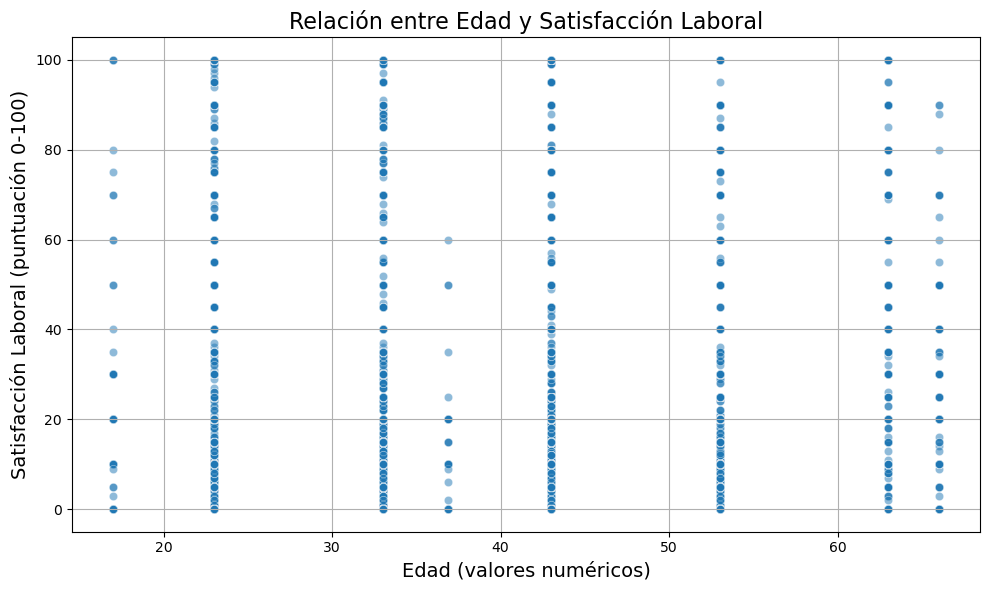

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Cargar el archivo CSV
# Asegúrate de poner la ruta correcta del archivo CSV
df = pd.read_csv('C:/Users/valki/Documents/Andre/IBM/Proyecto Final/Practicas Labs/Labs/survey-data.csv')

# Asegurarse de que las columnas relevantes sean numéricas
df['AgeNum'] = pd.to_numeric(df['AgeNum'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Eliminar filas con valores nulos en las columnas necesarias
df_clean = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='AgeNum', y='JobSatPoints_6', alpha=0.5)

# Etiquetas y título
plt.title('Relación entre Edad y Satisfacción Laboral', fontsize=16)
plt.xlabel('Edad (valores numéricos)', fontsize=14)
plt.ylabel('Satisfacción Laboral (puntuación 0-100)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
### Tarea 107 - Diagrama de dispersión para la compensación vs. la satisfacción laboral

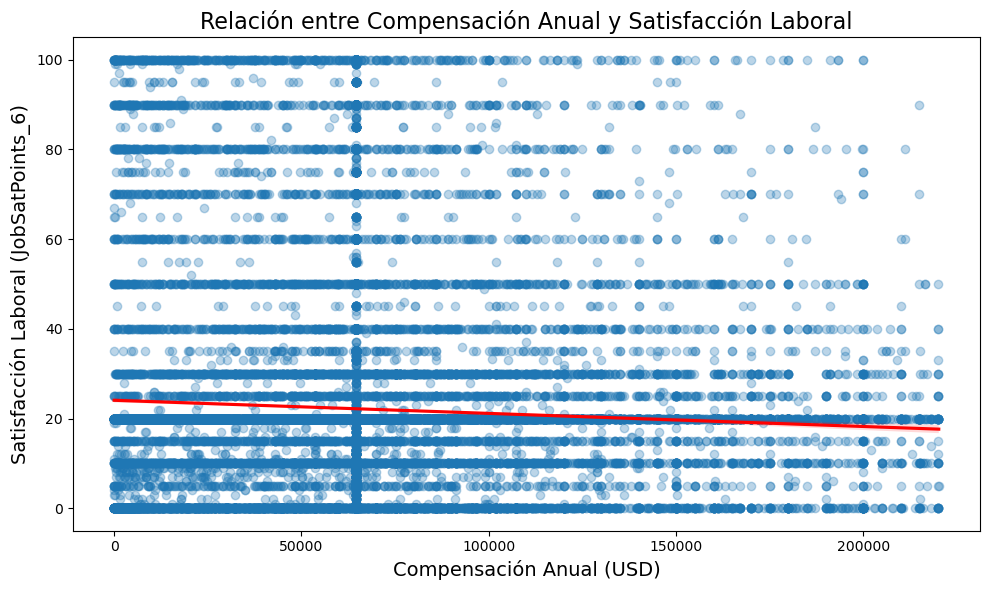

In [5]:
# Asegurarse de que las columnas sean numéricas
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Eliminar filas con valores faltantes
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='ConvertedCompYearly', y='JobSatPoints_6', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

plt.title('Relación entre Compensación Anual y Satisfacción Laboral', fontsize=16)
plt.xlabel('Compensación Anual (USD)', fontsize=14)
plt.ylabel('Satisfacción Laboral (JobSatPoints_6)', fontsize=14)
plt.tight_layout()
plt.show()

In [6]:
### Tarea 108 - Diagrama de dispersión con línea de tendencia para la edad vs. la satisfacción laboral

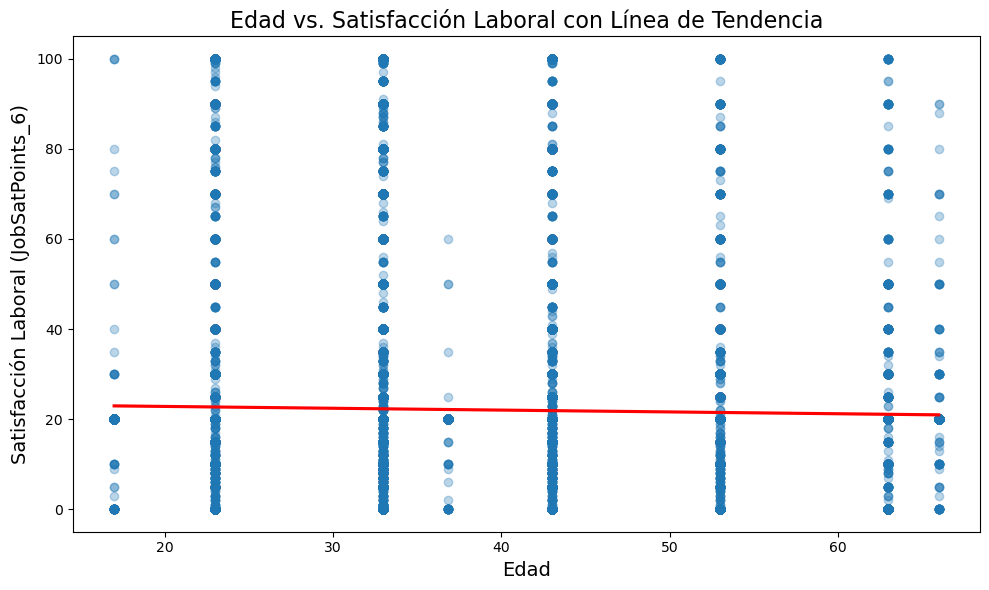

In [7]:
# Asegurar que las columnas sean numéricas
df['AgeNum'] = pd.to_numeric(df['AgeNum'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Eliminar filas con valores faltantes en las columnas de interés
df_clean = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

# Diagrama de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='AgeNum', y='JobSatPoints_6', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

plt.title('Edad vs. Satisfacción Laboral con Línea de Tendencia', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Satisfacción Laboral (JobSatPoints_6)', fontsize=14)
plt.tight_layout()
plt.show()

In [9]:
### Tarea 109 Diagrama de dispersión para edad vs. experiencia laboral

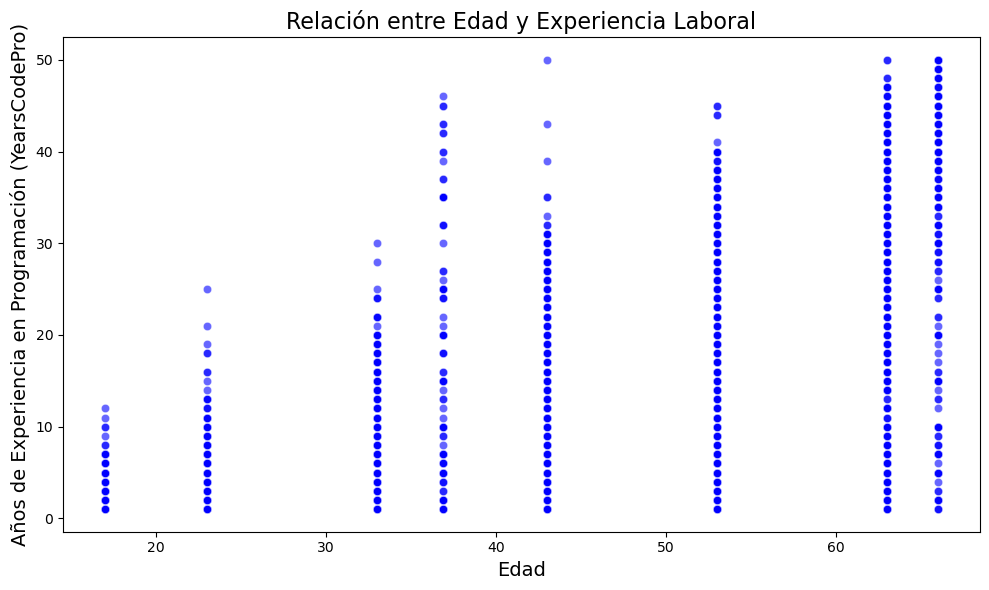

In [10]:
# Asegurar que las columnas sean numéricas
df['AgeNum'] = pd.to_numeric(df['AgeNum'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Eliminar filas con valores faltantes en las columnas de interés
df_clean = df.dropna(subset=['AgeNum', 'YearsCodePro'])

# Diagrama de dispersión para Edad vs. Experiencia Laboral
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='AgeNum', y='YearsCodePro', alpha=0.6, color='blue')

plt.title('Relación entre Edad y Experiencia Laboral', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Años de Experiencia en Programación (YearsCodePro)', fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
### Tarea 110 - Diagrama de burbujas de compensación vs. satisfacción laboral

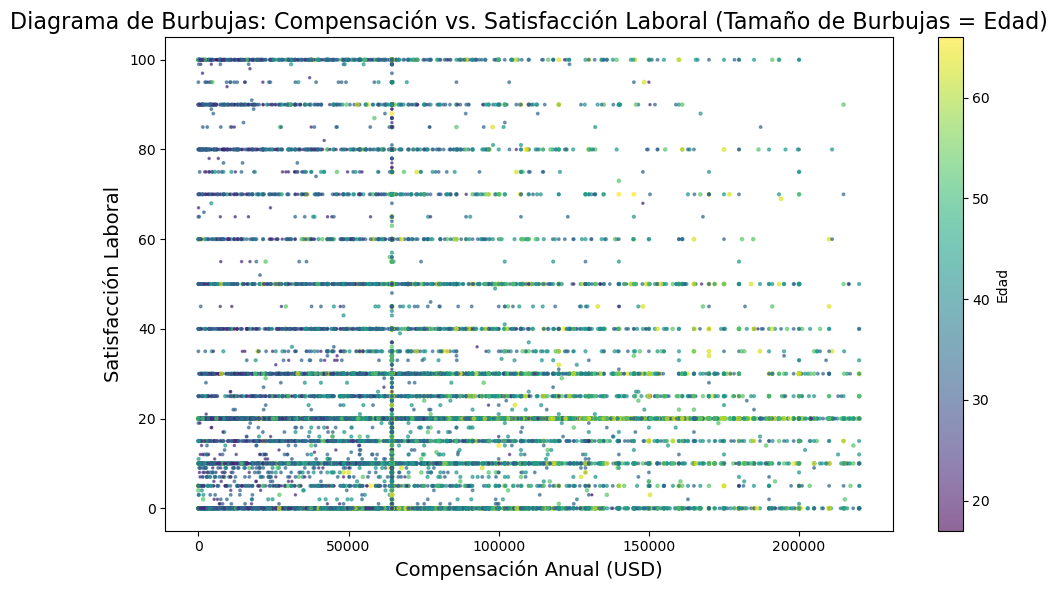

In [12]:
# Crear el diagrama de burbujas para Compensación vs. Satisfacción Laboral, con la Edad como tamaño de burbuja
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data=df,
    x='ConvertedCompYearly',  # Compensación Anual
    y='JobSatPoints_6',  # Satisfacción Laboral
    s=df['AgeNum'] / 10,  # Tamaño de burbuja proporcional a la Edad (ajustado para que se vean mejor)
    alpha=0.6,  # Transparencia de las burbujas
    c=df['AgeNum'],  # Color de las burbujas basado en la Edad
    cmap='viridis'  # Mapa de colores
)

# Títulos y etiquetas
plt.title('Diagrama de Burbujas: Compensación vs. Satisfacción Laboral (Tamaño de Burbujas = Edad)', fontsize=16)
plt.xlabel('Compensación Anual (USD)', fontsize=14)
plt.ylabel('Satisfacción Laboral', fontsize=14)

# Agregar barra de color
plt.colorbar(scatter, label='Edad')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [14]:
### Tarea 111 - Diagrama de dispersión para lenguajes de programación populares según satisfacción laboral

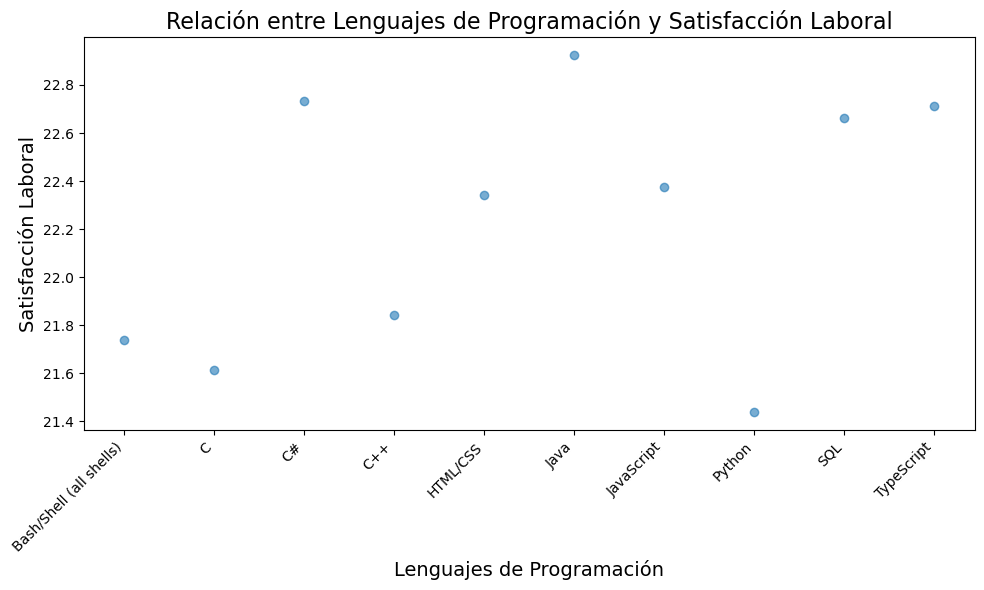

In [16]:
# Convertir a categorías la satisfacción laboral si no se hizo previamente
# Si la columna 'JobSatPoints_6' no es numérica, convertimos a numérica (si ya se hizo, omitir este paso)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Convertir la columna 'LanguageHaveWorkedWith' en listas de lenguajes
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(';')

# Crear un DataFrame vacío para almacenar los resultados
languages_satisfaction = []

# Iterar por cada fila y cada lenguaje asociado a un encuestado
for _, row in df.iterrows():
    if isinstance(row['Languages'], list):
        for language in row['Languages']:
            languages_satisfaction.append({
                'Language': language.strip(),
                'JobSatPoints_6': row['JobSatPoints_6']
            })

# Crear un DataFrame a partir de la lista
languages_df = pd.DataFrame(languages_satisfaction)

# Agrupar por lenguaje y calcular la media de satisfacción laboral
languages_grouped = languages_df.groupby('Language')['JobSatPoints_6'].mean().reset_index()

# Filtrar los lenguajes más populares (por ejemplo, los 10 más mencionados)
language_counts = df['Languages'].explode().value_counts()
top_languages = language_counts.head(10).index

# Filtrar los datos solo para los lenguajes más populares
top_languages_df = languages_grouped[languages_grouped['Language'].isin(top_languages)]

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(top_languages_df['Language'], top_languages_df['JobSatPoints_6'], alpha=0.6)

# Configurar etiquetas y título
plt.title('Relación entre Lenguajes de Programación y Satisfacción Laboral', fontsize=16)
plt.xlabel('Lenguajes de Programación', fontsize=14)
plt.ylabel('Satisfacción Laboral', fontsize=14)

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [19]:
### Tarea 112 - Diagrama de dispersión para la compensación vs. la satisfacción laboral por tipo de empleo

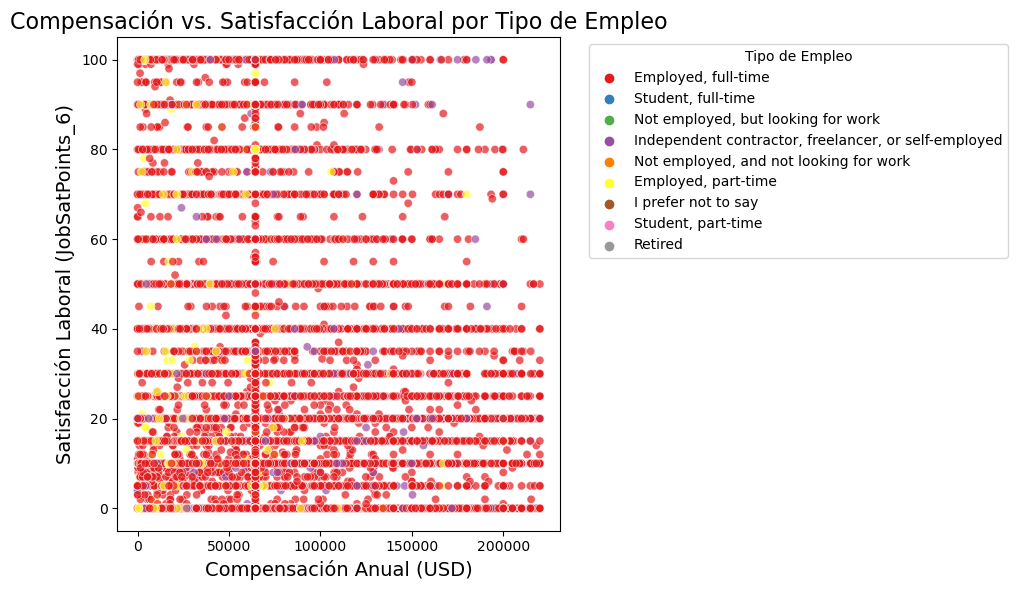

In [25]:
# Graficar el diagrama de dispersión categorizado por tipo de empleo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment_Label', palette='Set1', alpha=0.7)

# Ajustes y etiquetas
plt.title('Compensación vs. Satisfacción Laboral por Tipo de Empleo', fontsize=16)
plt.xlabel('Compensación Anual (USD)', fontsize=14)
plt.ylabel('Satisfacción Laboral (JobSatPoints_6)', fontsize=14)
plt.legend(title='Tipo de Empleo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [27]:
### Tarea 113 - Diagrama de dispersión para la experiencia laboral vs. el grupo de edad por país

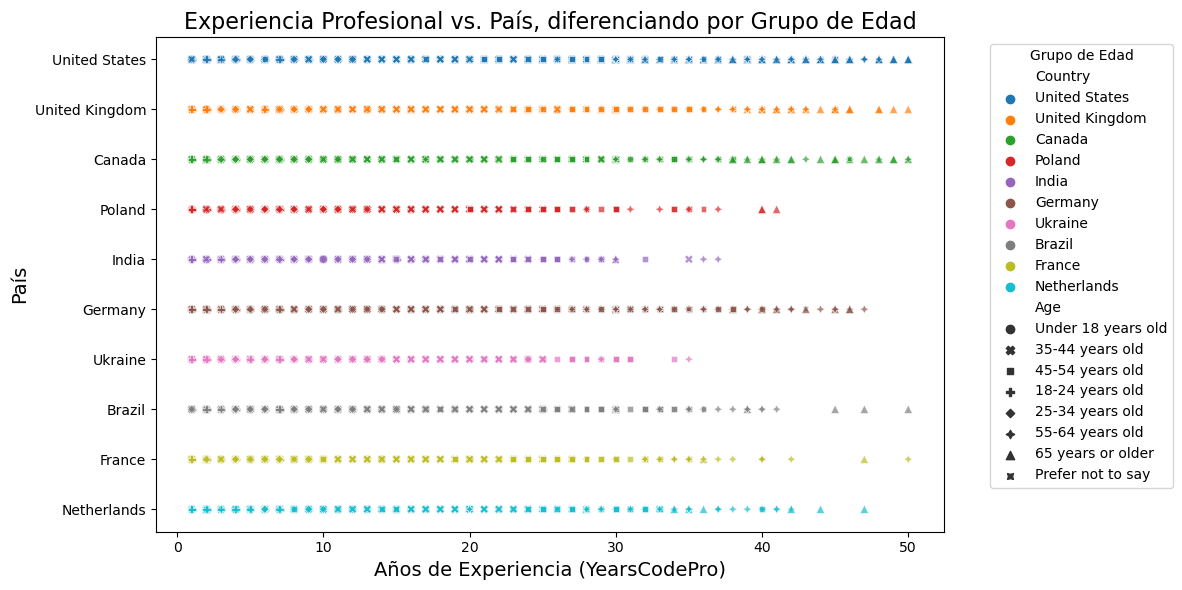

In [29]:
# Filtrar los 10 países con más encuestados
top_countries = df['Country'].value_counts().head(10).index
df_filtered = df[df['Country'].isin(top_countries)]


plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_filtered,
    x='YearsCodePro',
    y='Country',
    hue='Country',
    style='Age',
    palette='tab10',
    alpha=0.7
)

plt.title('Experiencia Profesional vs. País, diferenciando por Grupo de Edad', fontsize=16)
plt.xlabel('Años de Experiencia (YearsCodePro)', fontsize=14)
plt.ylabel('País', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de Edad')
plt.tight_layout()
plt.show()



In [30]:
### Laboratorios 15 - Gráficos de burbujas

In [31]:
### Tarea 114 - Gráfico de burbujas para edad vs. frecuencia de participación

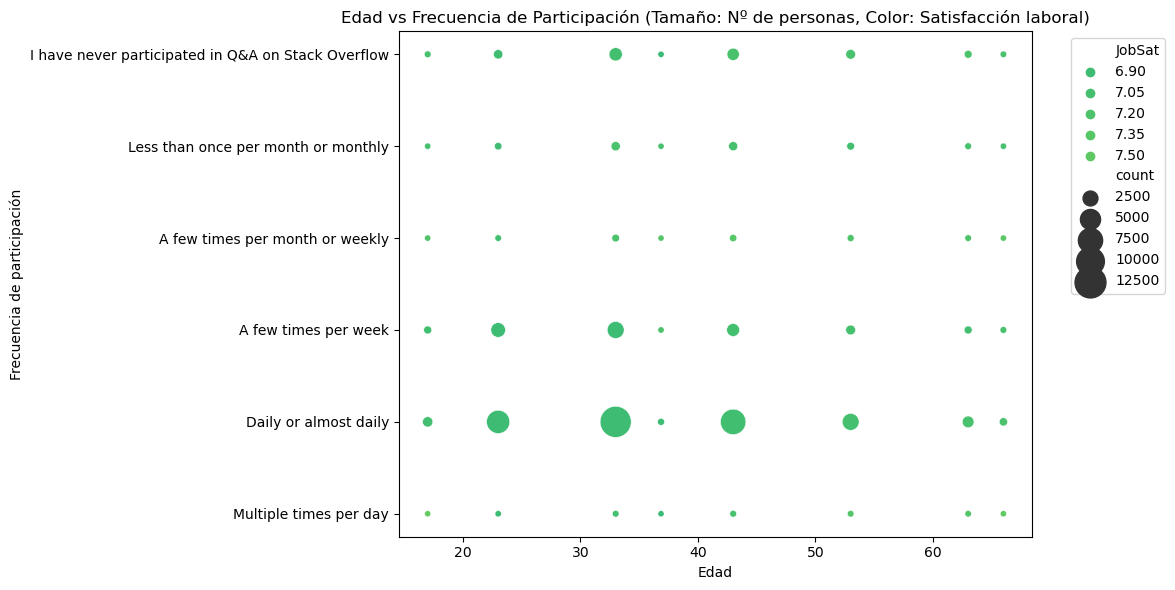

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Orden lógico para la frecuencia de participación
order_freq = [
    'I have never participated in Q&A on Stack Overflow',
    'Less than once per month or monthly',
    'A few times per month or weekly',
    'A few times per week',
    'Daily or almost daily',
    'Multiple times per day'
]

# Filtrar solo las columnas necesarias
df_bubble = df[df['SOPartFreq'].isin(order_freq)].copy()

# Agrupar y calcular la satisfacción promedio
grouped = df_bubble.groupby(['AgeNum', 'SOPartFreq'], observed=True).agg({
    'JobSat': 'mean',
    'SOPartFreq': 'count'  # cantidad de personas como tamaño de burbuja
}).rename(columns={'SOPartFreq': 'count'}).reset_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=grouped,
    x='AgeNum',
    y='SOPartFreq',
    size='count',
    hue='JobSat',
    sizes=(20, 500),
    palette='viridis',
    hue_norm=(0, 10)  # si quieres mantener escala de 0 a 10 en satisfacción
)

plt.title('Edad vs Frecuencia de Participación (Tamaño: Nº de personas, Color: Satisfacción laboral)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia de participación')
plt.yticks(ticks=range(len(order_freq)), labels=order_freq)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [46]:
### Tarea 115 - Visualice la relación entre la compensación anual (ConvertedCompYearly) y la satisfacción laboral (JobSat).

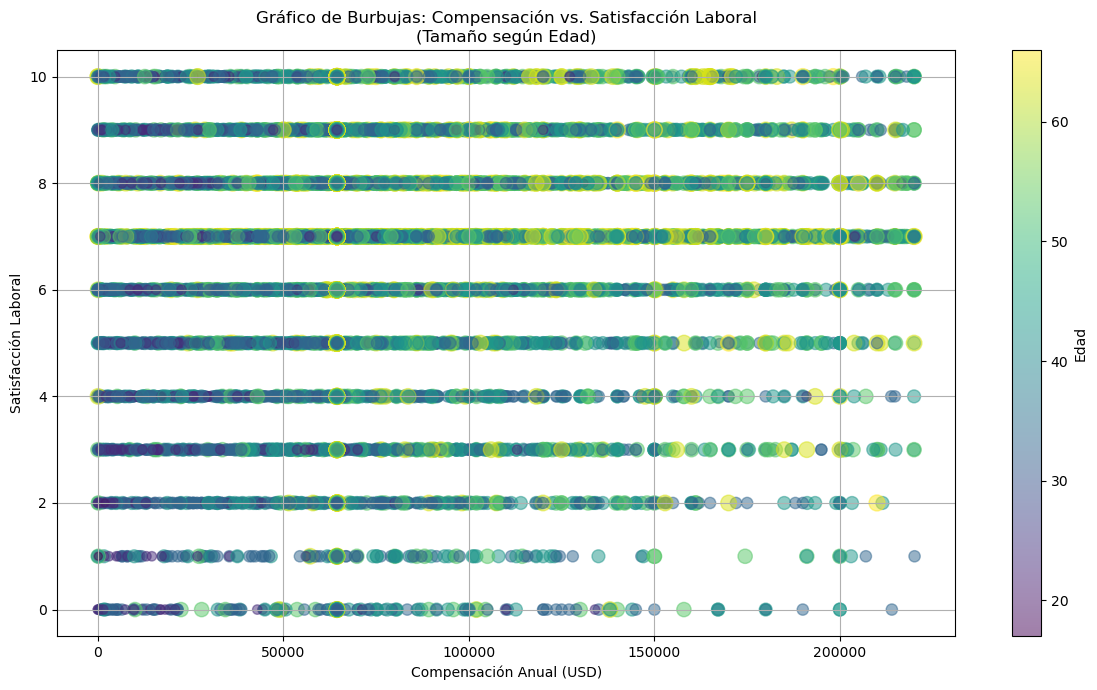

In [47]:
# Filtrar las filas válidas
df_bubble = df[['ConvertedCompYearly', 'JobSat', 'AgeNum']].dropna()

# Crear el gráfico de burbujas
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSat'],
    s=df_bubble['AgeNum']*2,  # Escalar para que se note el tamaño
    alpha=0.5,
    c=df_bubble['AgeNum'],
    cmap='viridis'
)

plt.xlabel('Compensación Anual (USD)')
plt.ylabel('Satisfacción Laboral')
plt.title('Gráfico de Burbujas: Compensación vs. Satisfacción Laboral\n(Tamaño según Edad)')
plt.colorbar(scatter, label='Edad')
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
### Tarea 116 - Gráfico de burbujas de preferencias tecnológicas por edad

C:\Users\valki\AppData\Local\Temp\ipykernel_30928\2902958049.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq = df_exploded.groupby(['AgeGroup', 'Languages']).size().reset_index(name='Frequency')


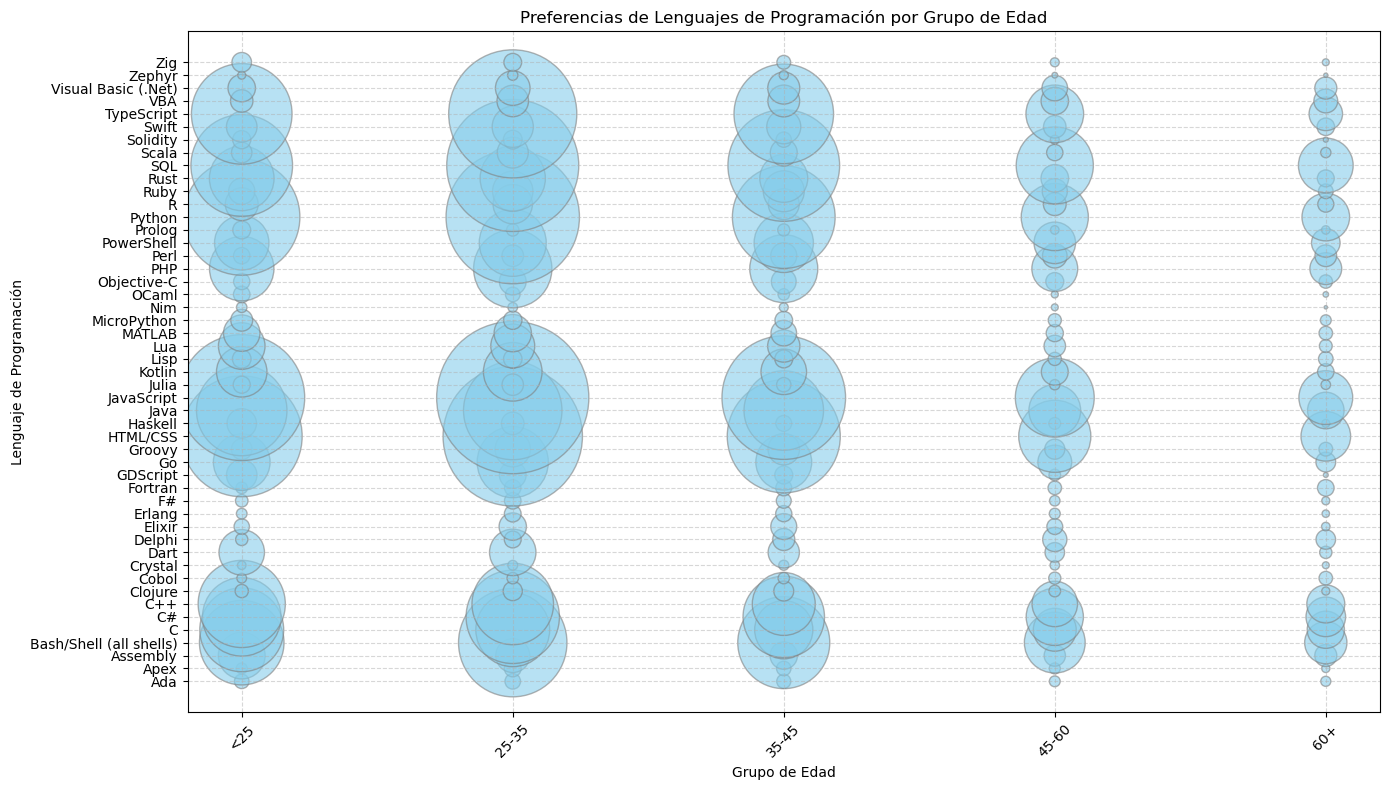

In [53]:
# Crear una copia del DataFrame original para trabajar sin modificarlo
df_copy = df.copy()

# Definir los rangos de edad y las etiquetas para los grupos de edad
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '25-35', '35-45', '45-60', '60+']

# Agregar la columna 'AgeGroup' en la copia del DataFrame
df_copy['AgeGroup'] = pd.cut(df_copy['AgeNum'], bins=bins, labels=labels)

# Convertimos la columna de lenguajes a listas
df_bubble = df_copy[['AgeGroup', 'LanguageHaveWorkedWith']].dropna().copy()
df_bubble['Languages'] = df_bubble['LanguageHaveWorkedWith'].str.split(';')

# Expandimos filas por lenguaje
df_exploded = df_bubble.explode('Languages')

# Agrupamos por edad y lenguaje, y contamos
freq = df_exploded.groupby(['AgeGroup', 'Languages']).size().reset_index(name='Frequency')

# Creamos el gráfico de burbujas
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=freq['AgeGroup'],
    y=freq['Languages'],
    s=freq['Frequency'] * 1,  # Escala de tamaño
    alpha=0.6,
    color='skyblue',
    edgecolors='gray'
)

plt.title('Preferencias de Lenguajes de Programación por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Lenguaje de Programación')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
### Tarea 117 - Gráfico de burbujas para bases de datos preferidas vs. satisfacción laboral

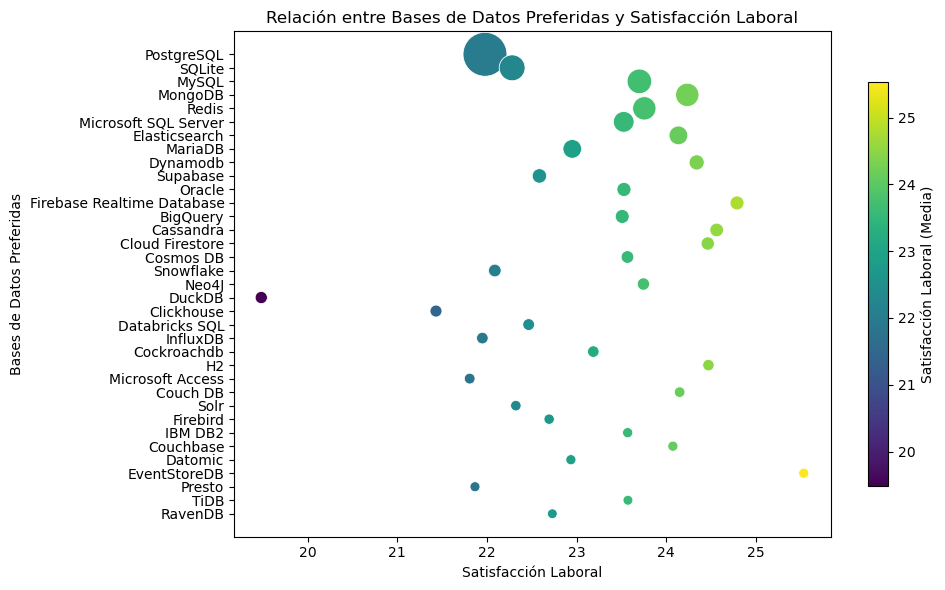

In [73]:
from matplotlib.lines import Line2D

# Procesar la columna 'DatabaseWantToWorkWith' para convertirla en listas
df_copy['Databases'] = df_copy['DatabaseWantToWorkWith'].str.split(';')

# Desempaquetar las bases de datos en filas separadas
databases_exploded = df_copy.explode('Databases')

# Eliminar espacios innecesarios
databases_exploded['Databases'] = databases_exploded['Databases'].str.strip()

# Contar la cantidad de encuestados por cada base de datos
database_counts = databases_exploded['Databases'].value_counts().reset_index()
database_counts.columns = ['Database', 'Count']

# Relacionar la base de datos con la satisfacción laboral media
database_sat = databases_exploded.groupby('Databases')['JobSatPoints_6'].mean().reset_index()

# Unir los dos DataFrames: uno con la frecuencia y otro con la satisfacción
database_data = pd.merge(database_counts, database_sat, left_on='Database', right_on='Databases')

# Crear el gráfico de burbujas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=database_data, x='JobSatPoints_6', y='Database', size='Count', sizes=(50, 1000), hue='JobSatPoints_6', palette='viridis', legend=False)

# Crear leyenda para el tamaño de las burbujas
sizes = [database_data['Count'].min(), database_data['Count'].median(), database_data['Count'].max()]
legend_elements_size = [plt.scatter([], [], s=s * 0.1, color='gray', alpha=0.6) for s in sizes]
labels_size = [f'{s:.0f} encuestados' for s in sizes]

# Crear leyenda para el color (satisfacción laboral)
norm = plt.Normalize(database_data['JobSatPoints_6'].min(), database_data['JobSatPoints_6'].max())
cmap = plt.cm.viridis
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label='Satisfacción Laboral (Media)', location='right', shrink=0.8)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Satisfacción Laboral (Media)', fontsize=10)

# Mejorar la visualización
plt.title('Relación entre Bases de Datos Preferidas y Satisfacción Laboral')
plt.xlabel('Satisfacción Laboral')
plt.ylabel('Bases de Datos Preferidas')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Tarea 119 - Gráfico de burbujas para la compensación en los roles de desarrollador

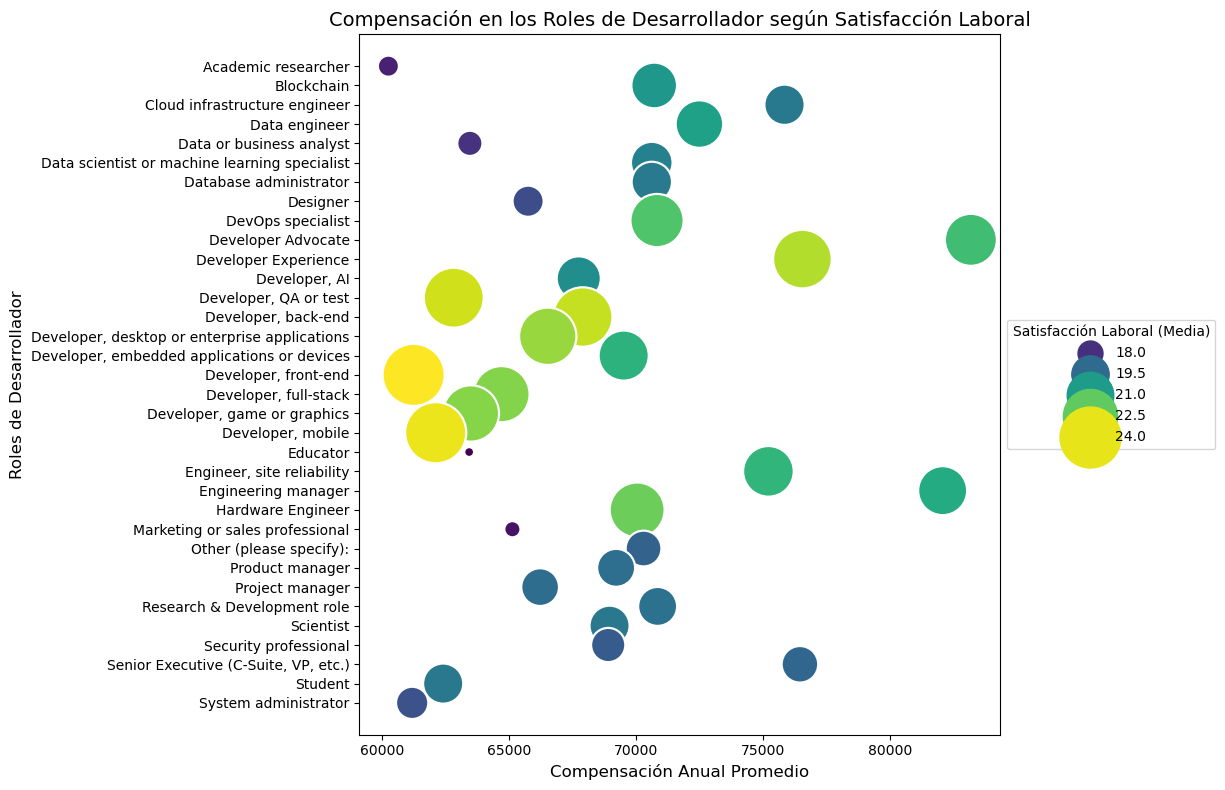

In [75]:
# Calcular la compensación promedio por rol de desarrollador
compensation_by_role = df_copy.groupby('DevType')['ConvertedCompYearly'].mean().reset_index()

# Calcular la satisfacción laboral promedio por rol de desarrollador
sat_by_role = df_copy.groupby('DevType')['JobSatPoints_6'].mean().reset_index()

# Unir los dos DataFrames: compensación y satisfacción por rol de desarrollador
role_data = pd.merge(compensation_by_role, sat_by_role, on='DevType')

# Crear el gráfico de burbujas
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=role_data, x='ConvertedCompYearly', y='DevType', size='JobSatPoints_6', sizes=(50, 2000), hue='JobSatPoints_6', palette='viridis')

# Mejorar la visualización
plt.title('Compensación en los Roles de Desarrollador según Satisfacción Laboral', fontsize=14)
plt.xlabel('Compensación Anual Promedio', fontsize=12)
plt.ylabel('Roles de Desarrollador', fontsize=12)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar espacio para la leyenda

# Añadir leyenda para el color (satisfacción laboral)
plt.legend(title='Satisfacción Laboral (Media)', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Mostrar el gráfico
plt.show()

In [76]:
### Tarea 120 - Gráfico de burbujas para herramientas de colaboración por edad

C:\Users\valki\AppData\Local\Temp\ipykernel_30928\999879425.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  collab_grouped = collab_tools.groupby(['CollabTools', 'AgeGroup']).size().reset_index(name='Frequency')


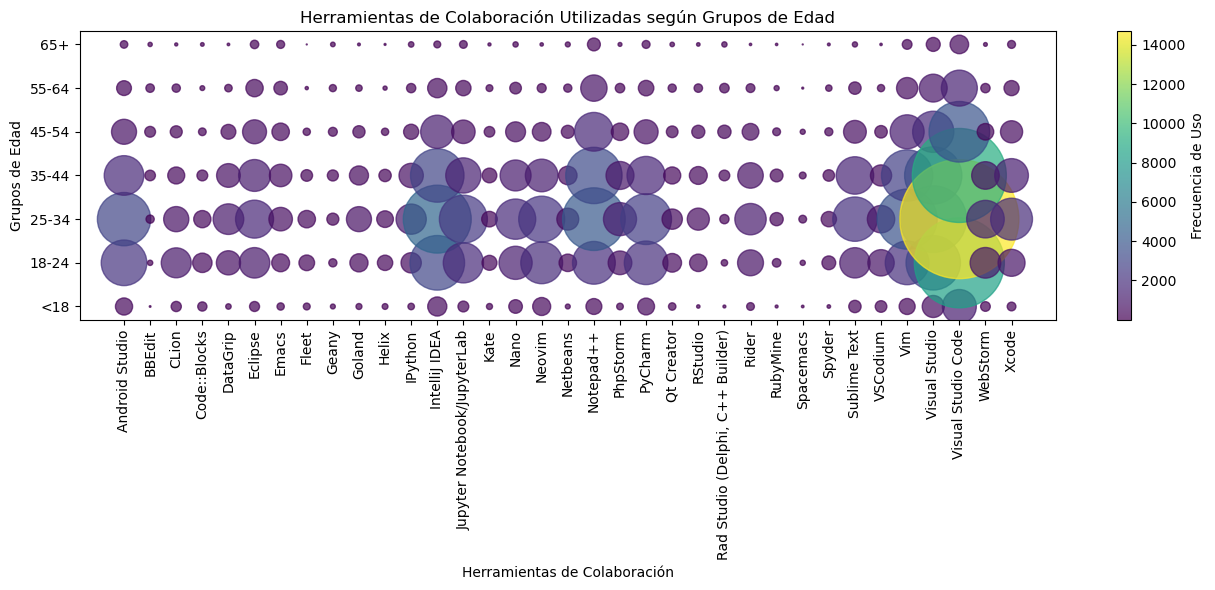

In [100]:
# Asegúrate de que las columnas no tengan nulos
df_copy = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'AgeNum'])

# Crear la columna de grupos de edad
bins = [0, 18, 24, 34, 44, 54, 64, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_copy['AgeGroup'] = pd.cut(df_copy['AgeNum'], bins=bins, labels=labels, right=False)

# Dividir la columna de herramientas de colaboración en listas
df_copy['CollabTools'] = df_copy['NEWCollabToolsHaveWorkedWith'].str.split(';')

# Explode las herramientas de colaboración
collab_tools = df_copy.explode('CollabTools')

# Agrupar por herramienta de colaboración y grupo de edad
collab_grouped = collab_tools.groupby(['CollabTools', 'AgeGroup']).size().reset_index(name='Frequency')

# Crear el gráfico de burbujas
plt.figure(figsize=(12, 6))
scatter = plt.scatter(data=collab_grouped, x='CollabTools', y='AgeGroup',
                      s=collab_grouped['Frequency'] * 0.5,  # Tamaño de burbuja basado en la frecuencia
                      c=collab_grouped['Frequency'], cmap='viridis', alpha=0.7)

# Mejorar la visualización
plt.title('Herramientas de Colaboración Utilizadas según Grupos de Edad')
plt.xlabel('Herramientas de Colaboración')
plt.ylabel('Grupos de Edad')
plt.xticks(rotation=90)

# Añadir la leyenda para el tamaño de burbuja (Frecuencia)
#plt.legend(title="Frecuencia", loc='upper right', bbox_to_anchor=(1.25, 1))

# Añadir la leyenda para el color (Frecuencia)
plt.colorbar(scatter, label="Frecuencia de Uso")

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1.1, 1])
plt.show()


In [86]:
### Tarea 121 - Gráfico de burbujas para frameworks web preferidos vs. satisfacción laboral

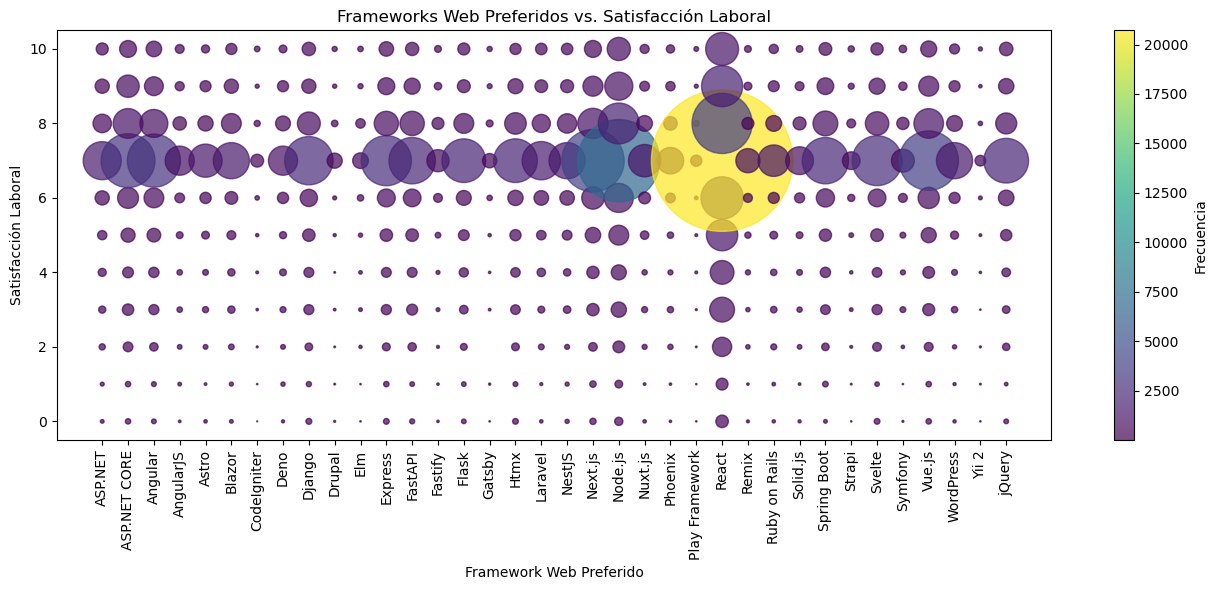

In [103]:
# Asegúrate de que las columnas no tengan nulos
df_copy = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Dividir la columna 'WebframeWantToWorkWith' en listas de frameworks
df_copy['WebFrames'] = df_copy['WebframeWantToWorkWith'].str.split(';')

# Explode los frameworks
webframe_tools = df_copy.explode('WebFrames')

# Agrupar por framework web y satisfacción laboral
webframe_grouped = webframe_tools.groupby(['WebFrames', 'JobSat']).size().reset_index(name='Frequency')

# Crear el gráfico de burbujas
plt.figure(figsize=(12, 6))
scatter = plt.scatter(data=webframe_grouped, x='WebFrames', y='JobSat',
                      s=webframe_grouped['Frequency'] * 0.5,  # Tamaño de burbuja basado en la frecuencia
                      c=webframe_grouped['Frequency'], cmap='viridis', alpha=0.7)

# Mejorar la visualización
plt.title('Frameworks Web Preferidos vs. Satisfacción Laboral')
plt.xlabel('Framework Web Preferido')
plt.ylabel('Satisfacción Laboral')
plt.xticks(rotation=90)

# Añadir la leyenda para el tamaño de burbuja (Frecuencia)
#plt.legend(title="Frecuencia", loc='upper right', bbox_to_anchor=(1.25, 1))

# Añadir la leyenda para el color (Frecuencia)
plt.colorbar(scatter, label="Frecuencia")

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1.1, 1])
plt.show()


In [104]:
### Tarea 122 - Gráfico de burbujas para tecnologías admiradas en distintos países

C:\Users\valki\AppData\Local\Temp\ipykernel_30928\1275269741.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admired_grouped_top10['Size'] = admired_grouped_top10['Frequency'] * 1


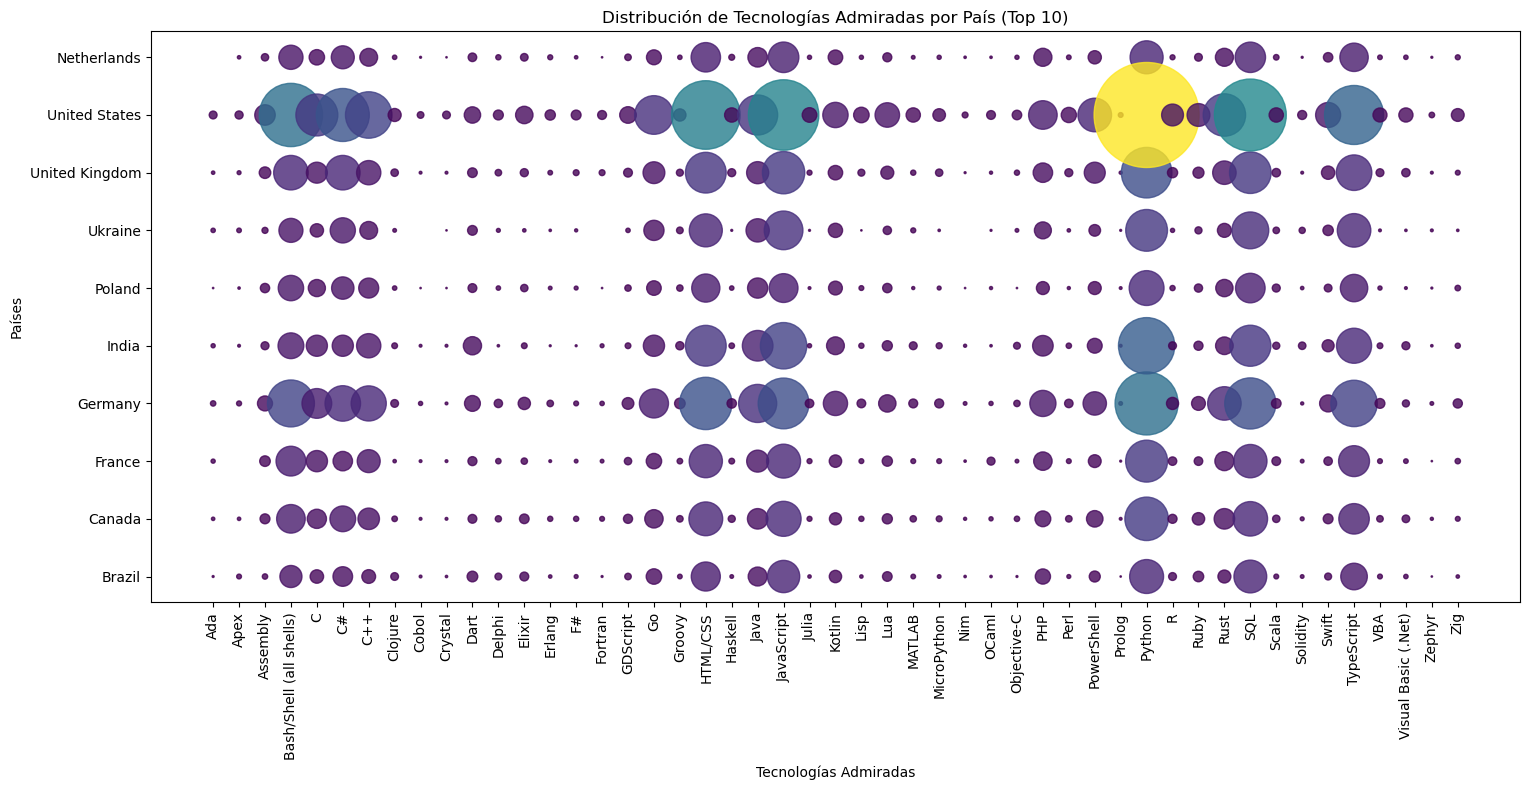

In [112]:

# Asegúrate de que 'LanguageAdmired' y 'Country' no contienen valores nulos
df_copy = df.dropna(subset=['LanguageAdmired', 'Country'])

# Desplegar las tecnologías admiradas
df_copy['AdmiredLanguages'] = df_copy['LanguageAdmired'].str.split(';')

# Expandir la columna 'AdmiredLanguages' para que cada tecnología sea una fila
admired_expanded = df_copy.explode('AdmiredLanguages')

# Agrupar por tecnología admirada y país, contando las ocurrencias
admired_grouped = admired_expanded.groupby(['AdmiredLanguages', 'Country']).size().reset_index(name='Frequency')

# Filtrar el Top 10 países con mayor frecuencia
top_countries = admired_grouped.groupby('Country')['Frequency'].sum().nlargest(10).index
admired_grouped_top10 = admired_grouped[admired_grouped['Country'].isin(top_countries)]

# Reducir el tamaño de las burbujas para evitar la superposición
admired_grouped_top10['Size'] = admired_grouped_top10['Frequency'] * 1

# Crear el gráfico de burbujas
plt.figure(figsize=(14, 8))

scatter = plt.scatter(data=admired_grouped_top10, x='AdmiredLanguages', y='Country', 
                      s=admired_grouped_top10['Size'],  # Tamaño de la burbuja basado en la frecuencia
                      c=admired_grouped_top10['Frequency'], cmap='viridis', alpha=0.8)

# Mejorar la visualización
plt.title('Distribución de Tecnologías Admiradas por País (Top 10)')
plt.xlabel('Tecnologías Admiradas')
plt.ylabel('Países')
plt.xticks(rotation=90)  # Rotar los nombres de las tecnologías para mayor claridad

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1.1, 1])
plt.show()


In [114]:
### Laboratorios 16 - Visualización de la composición de datos con gráficos circulares

In [115]:
### Tarea 123: Crear un gráfico circular de las 5 bases de datos principales con las que los encuestados desean trabajar

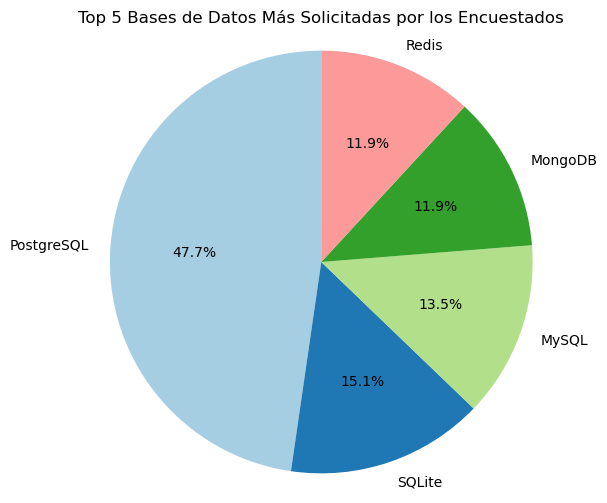

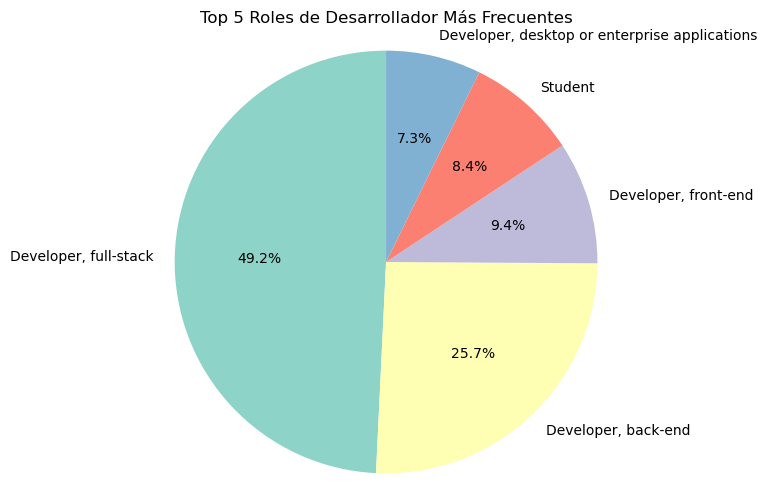

In [118]:
import matplotlib.pyplot as plt

# Tarea 1: Gráfico circular para las 5 bases de datos más solicitadas
# Desplegar las bases de datos preferidas
df_copy = df.dropna(subset=['DatabaseWantToWorkWith'])

# Expandir la columna 'DatabaseWantToWorkWith' para crear una fila por cada base de datos preferida
df_copy['Databases'] = df_copy['DatabaseWantToWorkWith'].str.split(';')
databases_expanded = df_copy.explode('Databases')

# Contar la frecuencia de cada base de datos
database_counts = databases_expanded['Databases'].value_counts().head(5)

# Crear el gráfico circular para las bases de datos más solicitadas
plt.figure(figsize=(6, 6))
plt.pie(database_counts, labels=database_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Bases de Datos Más Solicitadas por los Encuestados')
plt.axis('equal')  # Hacer que el gráfico sea circular
plt.show()


# Tarea 2: Gráfico circular para los 5 roles principales de desarrollador
# Contar la frecuencia de cada tipo de desarrollador
df_copy = df.dropna(subset=['DevType'])
devtype_counts = df_copy['DevType'].value_counts().head(5)

# Crear el gráfico circular para los roles de desarrollador más frecuentes
plt.figure(figsize=(6, 6))
plt.pie(devtype_counts, labels=devtype_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Top 5 Roles de Desarrollador Más Frecuentes')
plt.axis('equal')  # Hacer que el gráfico sea circular
plt.show()


In [119]:
### Tarea 124: Crear un gráfico circular de los sistemas operativos que los encuestados utilizan profesionalmente

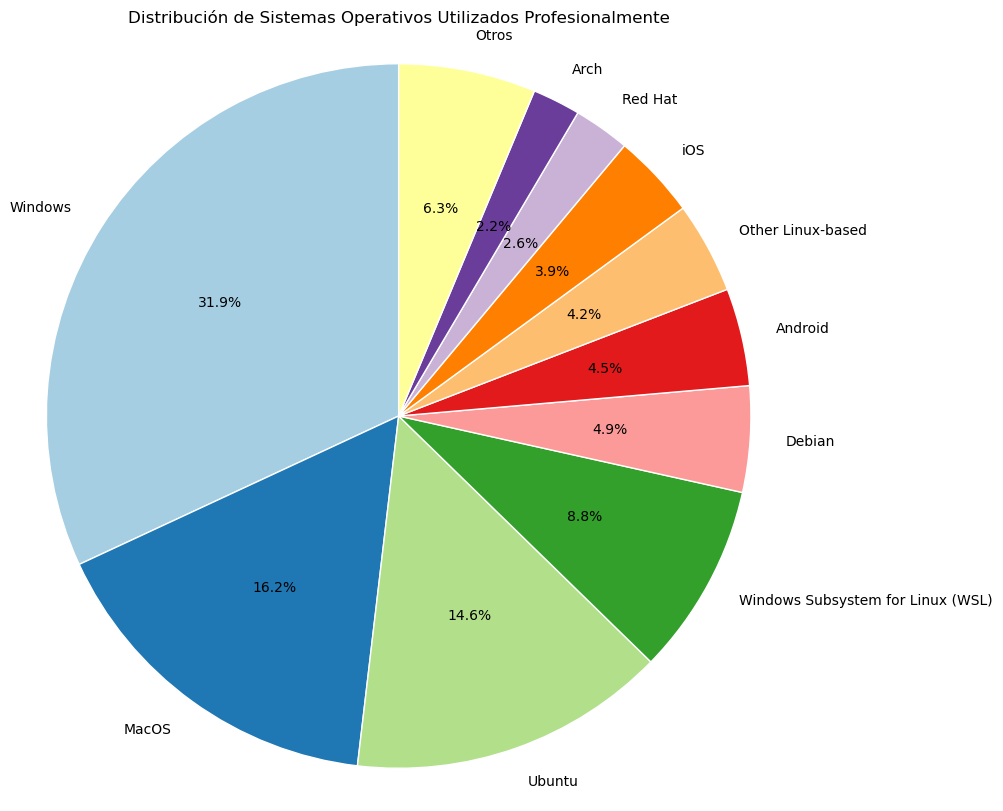

In [133]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar filas con valores válidos en la columna 'OpSysProfessional use'
df_copy = df.dropna(subset=['OpSysProfessional use'])

# Desplegar los sistemas operativos utilizados profesionalmente
df_copy['OpSys'] = df_copy['OpSysProfessional use'].str.split(';')
op_sys_expanded = df_copy.explode('OpSys')

# Contar la frecuencia de cada sistema operativo
op_sys_counts = op_sys_expanded['OpSys'].value_counts()

# Agrupar las categorías pequeñas en "Otros"
threshold = 0.02  # Umbral para agrupar en "Otros", por ejemplo, categorías con menos del 2% de los datos
other_count = op_sys_counts[op_sys_counts / op_sys_counts.sum() < threshold].sum()
op_sys_counts = op_sys_counts[op_sys_counts / op_sys_counts.sum() >= threshold]

# Añadir "Otros" con la suma de las categorías pequeñas
if other_count > 0:
    op_sys_counts = pd.concat([op_sys_counts, pd.Series({'Otros': other_count})])

# Crear el gráfico circular mejorado
plt.figure(figsize=(10, 10))
plt.pie(op_sys_counts, labels=op_sys_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})

# Título
plt.title('Distribución de Sistemas Operativos Utilizados Profesionalmente')

# Ajustar el gráfico para que sea circular
plt.axis('equal')  # Mantener el gráfico como un círculo perfecto
plt.show()


In [134]:
### Tarea 125: Gráfico circular de los 5 lenguajes de programación más utilizados por los encuestados

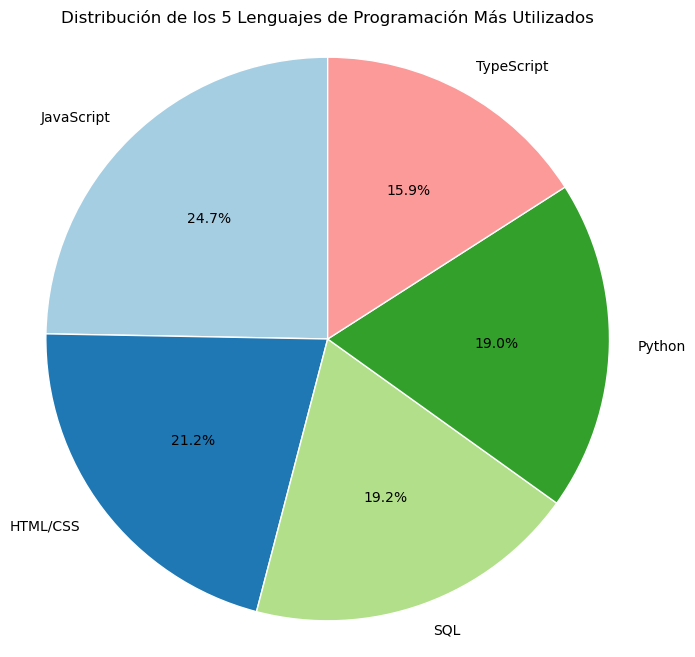

In [136]:
# Filtrar filas con valores válidos en la columna 'LanguageHaveWorkedWith'
df_copy = df.dropna(subset=['LanguageHaveWorkedWith'])

# Desplegar los lenguajes de programación con los que los encuestados han trabajado
df_copy['Languages'] = df_copy['LanguageHaveWorkedWith'].str.split(';')
languages_expanded = df_copy.explode('Languages')

# Contar la frecuencia de cada lenguaje de programación
language_counts = languages_expanded['Languages'].value_counts()

# Seleccionar los 5 lenguajes más utilizados
top_languages = language_counts.head(5)

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(top_languages, labels=top_languages.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})

# Título
plt.title('Distribución de los 5 Lenguajes de Programación Más Utilizados')

# Ajustar el gráfico para que sea circular
plt.axis('equal')  # Mantener el gráfico como un círculo perfecto
plt.show()


In [137]:
### Tarea 126: Gráfico circular de las principales herramientas de colaboración utilizadas en el ámbito profesional

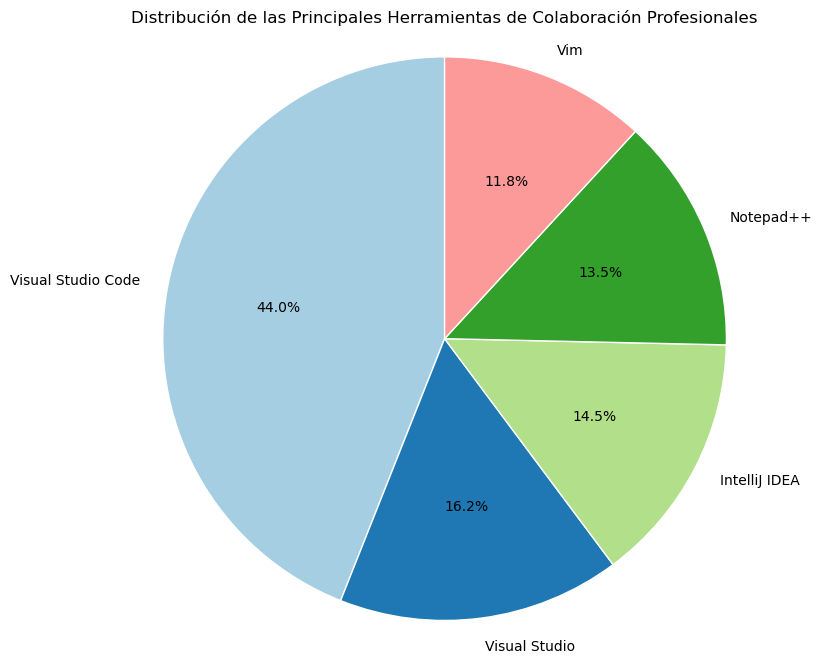

In [140]:
# Filtrar filas con valores válidos en la columna 'NEWCollabToolsHaveWorkedWith'
df_copy = df.dropna(subset=['NEWCollabToolsHaveWorkedWith'])

# Desplegar las herramientas de colaboración utilizadas
df_copy['CollabTools'] = df_copy['NEWCollabToolsHaveWorkedWith'].str.split(';')
collab_tools_expanded = df_copy.explode('CollabTools')

# Contar la frecuencia de cada herramienta de colaboración
collab_tool_counts = collab_tools_expanded['CollabTools'].value_counts()

# Seleccionar las herramientas más utilizadas (top 5 o más si lo prefieres)
top_collab_tools = collab_tool_counts.head(5)

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(top_collab_tools, labels=top_collab_tools.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})

# Título
plt.title('Distribución de las Principales Herramientas de Colaboración Profesionales')

# Ajustar el gráfico para que sea circular
plt.axis('equal')  # Mantener el gráfico como un círculo perfecto
plt.show()


In [141]:
### Tarea 127: Análisis e interpretación de la composición

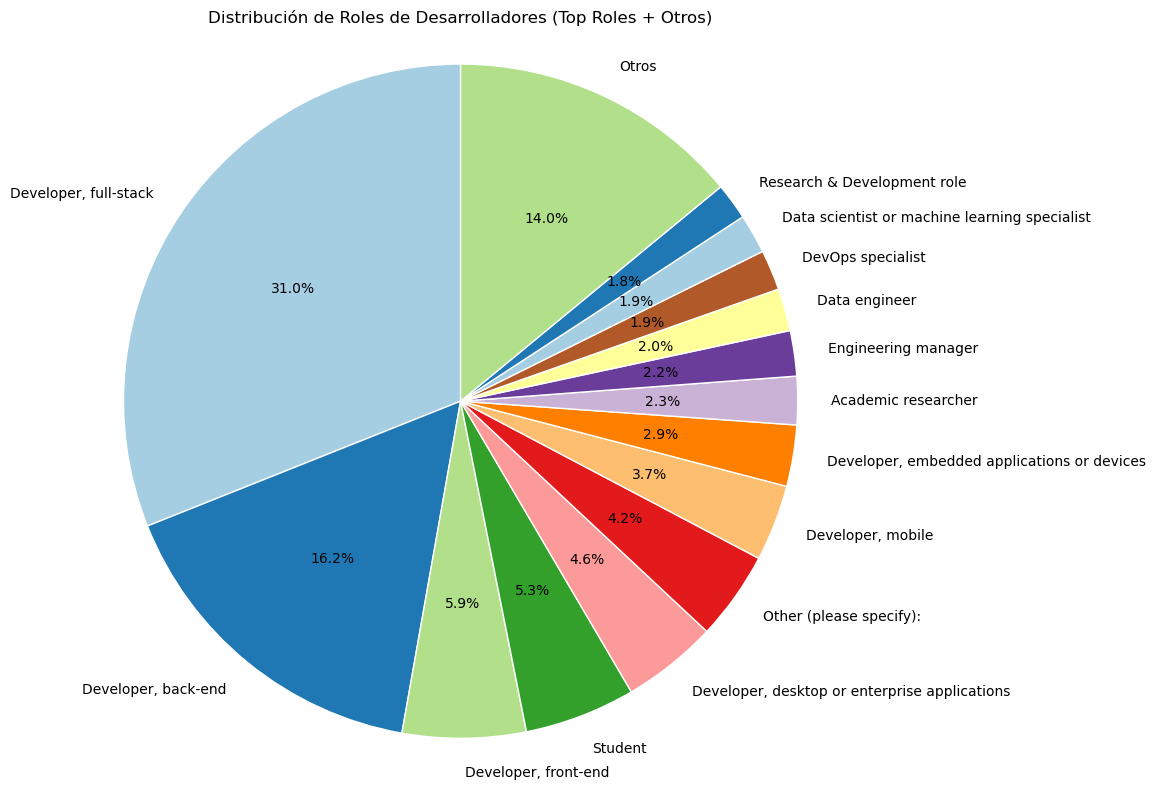

In [149]:
# 1. Distribución de Roles de Desarrolladores (DevType)
# Contamos las ocurrencias de cada tipo de desarrollador
devtype_counts = df_copy['DevType'].value_counts()

# Establecemos un umbral mínimo del 2% para considerar un rol como relevante
threshold = devtype_counts.sum() * 0.015
top_roles = devtype_counts[devtype_counts >= threshold]

# Agrupar el resto en "Otros"
other_roles = devtype_counts[devtype_counts < threshold].sum()
top_roles['Otros'] = other_roles

# Crear el gráfico circular
plt.figure(figsize=(10, 8))
plt.pie(top_roles, labels=top_roles.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})
plt.title("Distribución de Roles de Desarrolladores (Top Roles + Otros)")
plt.axis('equal')  # Igualar los ejes para que el gráfico sea circular

# Ajustar el gráfico para que las leyendas no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


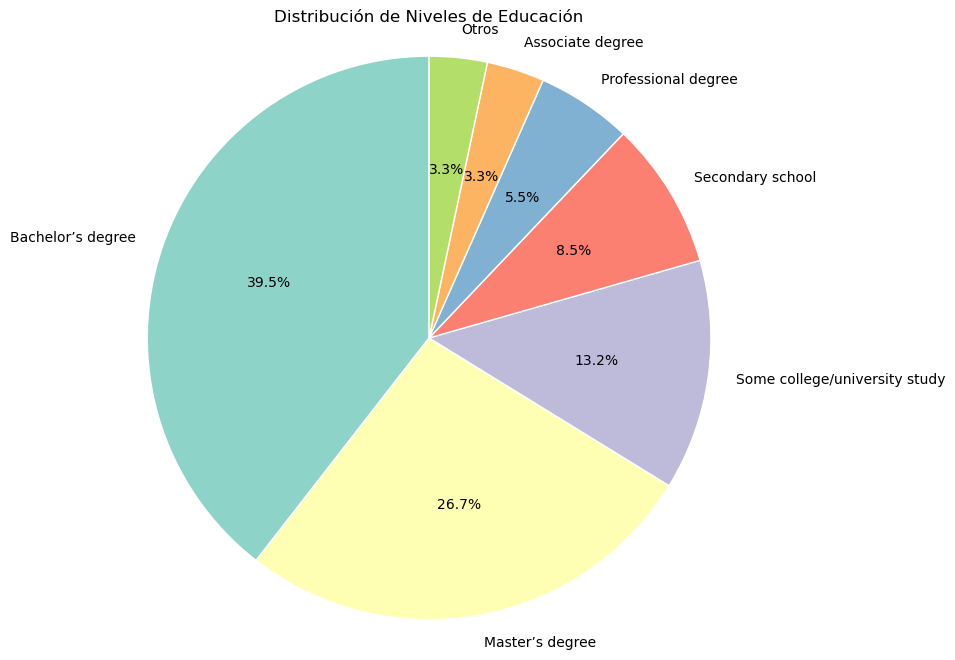

In [157]:
# 2. Distribución de Niveles de Educación (EdLevel)

# Contamos los niveles educativos
education_counts = df_copy['EdLevel'].value_counts()

# Establecemos un umbral para filtrar las categorías pequeñas
threshold = 0.02  # Umbral de 5% de frecuencia
small_categories = education_counts[education_counts / education_counts.sum() < threshold]

# Añadimos una categoría 'Otros' para las categorías pequeñas
if not small_categories.empty:
    other_count = small_categories.sum()
    education_counts = education_counts[education_counts / education_counts.sum() >= threshold]
    education_counts['Otros'] = other_count

# Crear gráfico circular mejorado
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})

plt.title("Distribución de Niveles de Educación")
plt.axis('equal')  # Igualar los ejes para que el gráfico sea circular
plt.show()


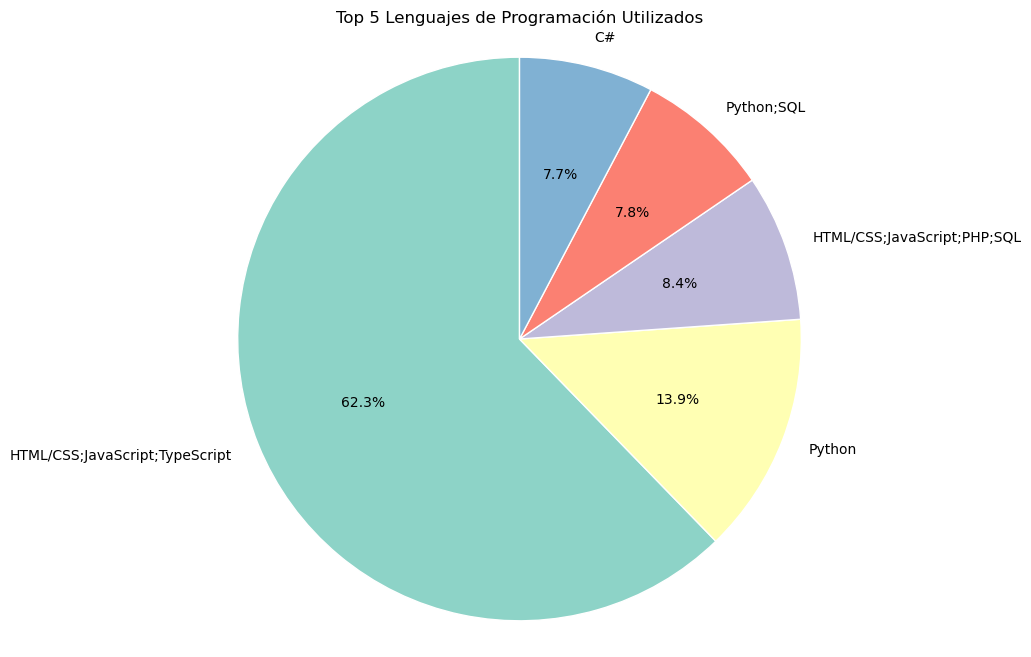

In [159]:
# 3. Preferencia de Lenguajes de Programación Utilizados (LanguageHaveWorkedWith)
# Contamos los lenguajes de programación más utilizados
language_counts = df_copy['LanguageHaveWorkedWith'].value_counts().head(5)

# Crear gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})
plt.title("Top 5 Lenguajes de Programación Utilizados")
plt.axis('equal')  # Igualar los ejes para que el gráfico sea circular
plt.show()


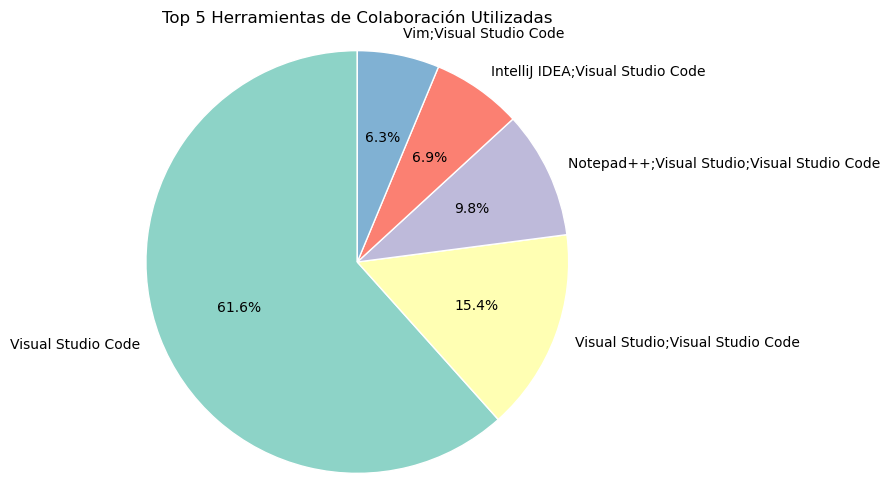

In [161]:
# 4. Uso de Herramientas de Colaboración en el Trabajo (NEWCollabToolsHaveWorkedWith)

# Contamos las herramientas de colaboración más utilizadas
collab_tool_counts = df_copy['NEWCollabToolsHaveWorkedWith'].value_counts().head(5)

# Crear gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(collab_tool_counts, labels=collab_tool_counts.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})
plt.title("Top 5 Herramientas de Colaboración Utilizadas")
plt.axis('equal')  # Igualar los ejes para que el gráfico sea circular
plt.show()


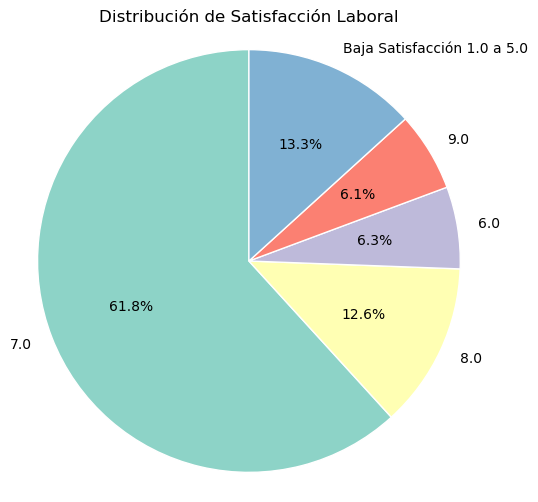

In [165]:
# 5. Distribución de Satisfacción Laboral (JobSat)
# Contamos los niveles de satisfacción laboral
job_sat_counts = df_copy['JobSat'].value_counts()

# Establecemos un umbral para agrupar las categorías de baja satisfacción
threshold = 0.05  # Umbral de 5% de frecuencia
small_categories = job_sat_counts[job_sat_counts / job_sat_counts.sum() < threshold]

# Añadimos una categoría 'Baja Satisfacción' para las categorías pequeñas
if not small_categories.empty:
    other_count = small_categories.sum()
    job_sat_counts = job_sat_counts[job_sat_counts / job_sat_counts.sum() >= threshold]
    job_sat_counts['Baja Satisfacción 1.0 a 5.0'] = other_count

# Crear gráfico circular mejorado
plt.figure(figsize=(6, 6))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})
plt.title("Distribución de Satisfacción Laboral")
plt.axis('equal')  # Igualar los ejes para que el gráfico sea circular
plt.show()


In [166]:
### Tarea 128: Gráfico circular de los lenguajes de programación más admirados por los encuestados

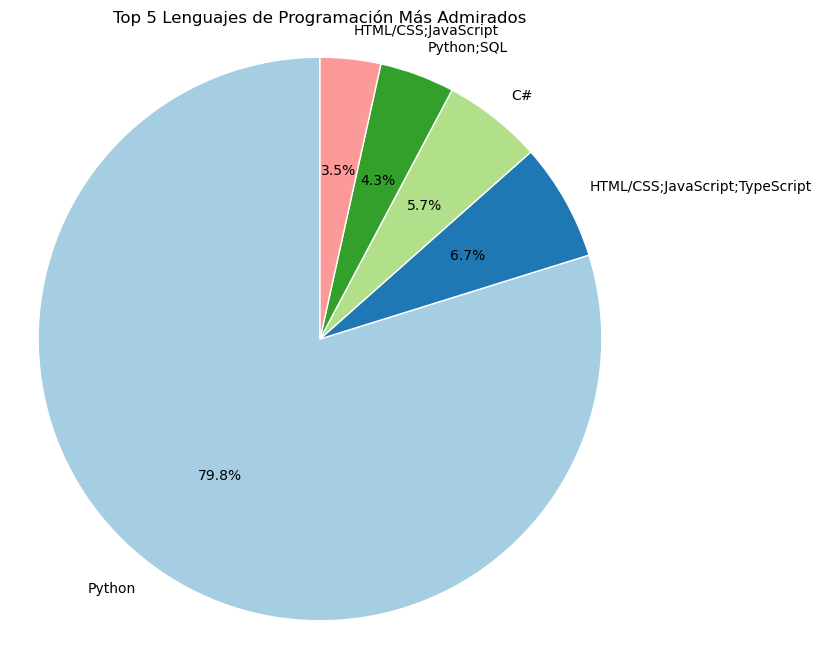

In [170]:
# Contar las ocurrencias de cada lenguaje admirado
language_counts = df_copy['LanguageAdmired'].value_counts()

# Obtener los 5 lenguajes más admirados
top_5_languages = language_counts.head(5)

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(top_5_languages, labels=top_5_languages.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})
plt.title("Top 5 Lenguajes de Programación Más Admirados")
plt.axis('equal')  # Igualar los ejes para que el gráfico sea circular

# Mostrar el gráfico
plt.show()


In [171]:
### Tarea 129: Gráfico circular de las herramientas utilizadas para el desarrollo de IA

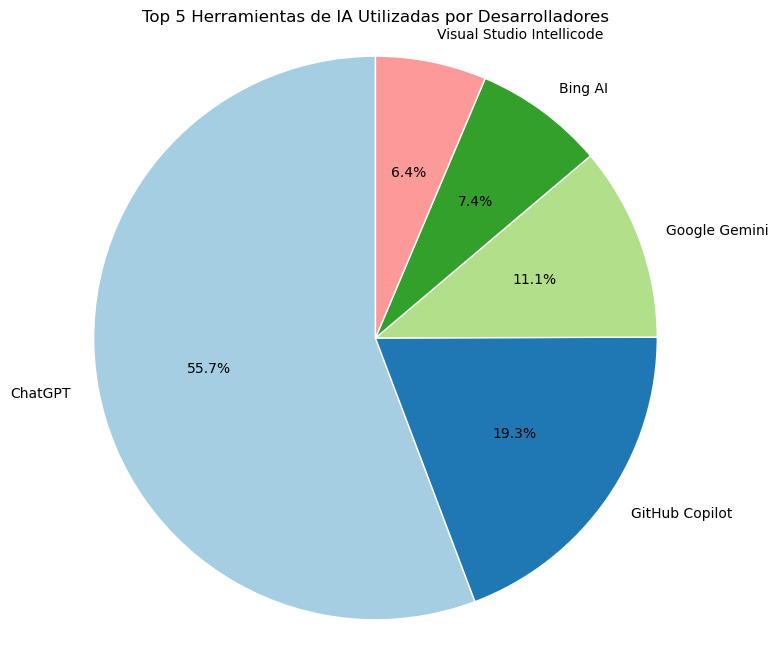

In [185]:
# Contamos las herramientas de IA que los desarrolladores están utilizando actualmente
# Contamos las herramientas de IA utilizadas (se separan por punto y coma)
tools = df_copy['AISearchDevHaveWorkedWith'].dropna().str.split(';', expand=True).stack()

# Contamos las frecuencias de cada herramienta
tool_counts = tools.value_counts()

# Seleccionamos las 5 herramientas más utilizadas
top_tools = tool_counts.head(5)

# Crear gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(top_tools, labels=top_tools.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})
plt.title("Top 5 Herramientas de IA Utilizadas por Desarrolladores")
plt.axis('equal')  # Igualar los ejes para que el gráfico sea circular
plt.show()

In [186]:
### Tarea 130: Gráfico circular de los frameworks web preferidos

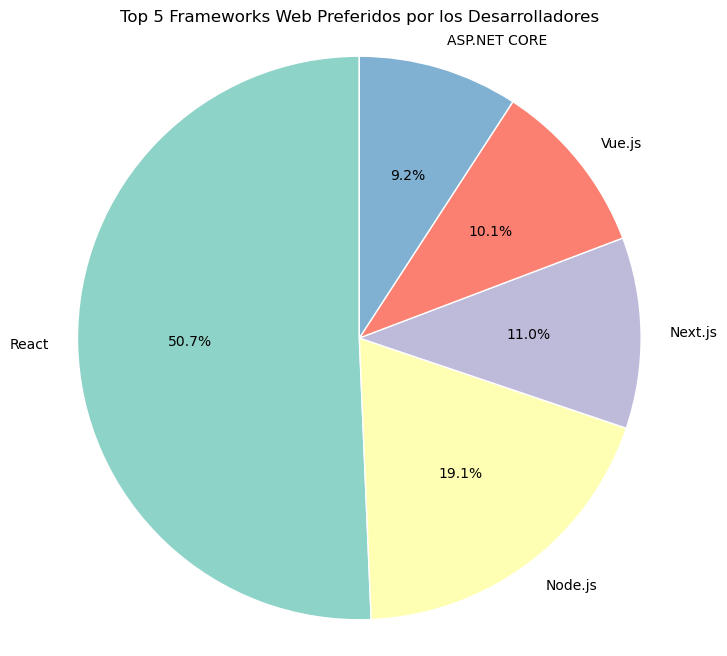

In [195]:
# Contamos los frameworks web de interés (se separan por punto y coma)
web_frameworks = df_copy['WebframeWantToWorkWith'].dropna().str.split(';', expand=True).stack()

# Contamos las frecuencias de cada framework
framework_counts = web_frameworks.value_counts()

# Seleccionamos los 5 frameworks más mencionados
top_frameworks = framework_counts.head(5)

# Crear gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(top_frameworks, labels=top_frameworks.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})
plt.title("Top 5 Frameworks Web Preferidos por los Desarrolladores")
plt.axis('equal')  # Igualar los ejes para que el gráfico sea circular
plt.show()


In [190]:
### Tarea 131: Gráfico circular de las tecnologías integradas más deseadas

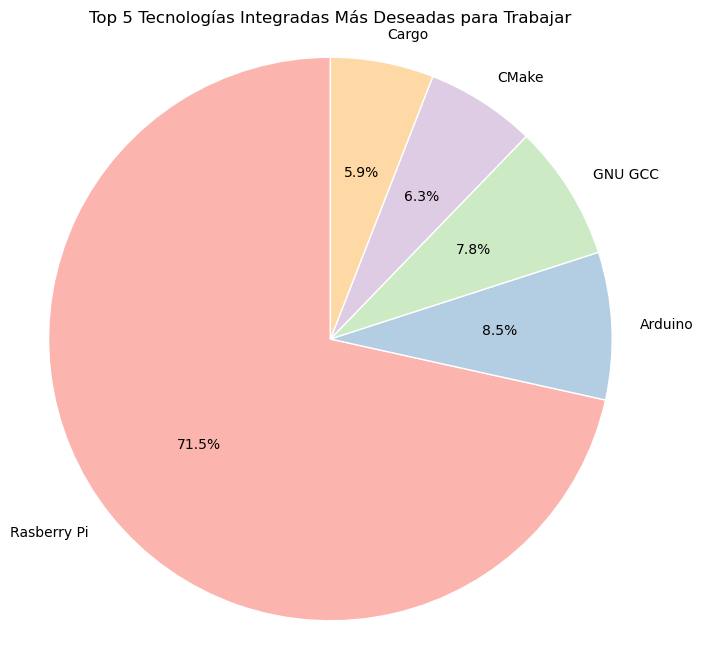

In [198]:
# Separar las tecnologías integradas en "EmbeddedWantToWorkWith"
embedded_technologies = df_copy['EmbeddedWantToWorkWith'].dropna().str.split(';', expand=True).stack()

# Contar la frecuencia de cada tecnología
technology_counts = embedded_technologies.value_counts()

# Seleccionar las 5 tecnologías más deseadas
top_5_technologies = technology_counts.head(5)

# Crear gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(top_5_technologies, labels=top_5_technologies.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Pastel1.colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.0}, textprops={'fontsize': 10})
plt.title("Top 5 Tecnologías Integradas Más Deseadas para Trabajar")
plt.axis('equal')  # Igualar los ejes para que el gráfico sea circular
plt.show()


In [199]:
### Laboratorio 17 - Gráfica apilada para la composición de la satisfacción laboral en diferentes grupos de edad

In [200]:
# Tarea 132: Gráfica apilada de las medianas de JobSatPoints_6 y JobSatPoints_7 para diferentes grupos de edad

In [205]:
df_copy['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [202]:
# Agrupar por rangos de edad en la columna 'Age' y calcular la mediana de JobSatPoints_6 y JobSatPoints_7
median_job_sat = df_copy.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Mostrar el DataFrame de medianas
print(median_job_sat)


                    JobSatPoints_6  JobSatPoints_7
Age                                               
18-24 years old               20.0            15.0
25-34 years old               20.0            15.0
35-44 years old               20.0            15.0
45-54 years old               20.0            15.0
55-64 years old               20.0            15.0
65 years or older             20.0            15.0
Prefer not to say             20.0            15.0
Under 18 years old            20.0            15.0


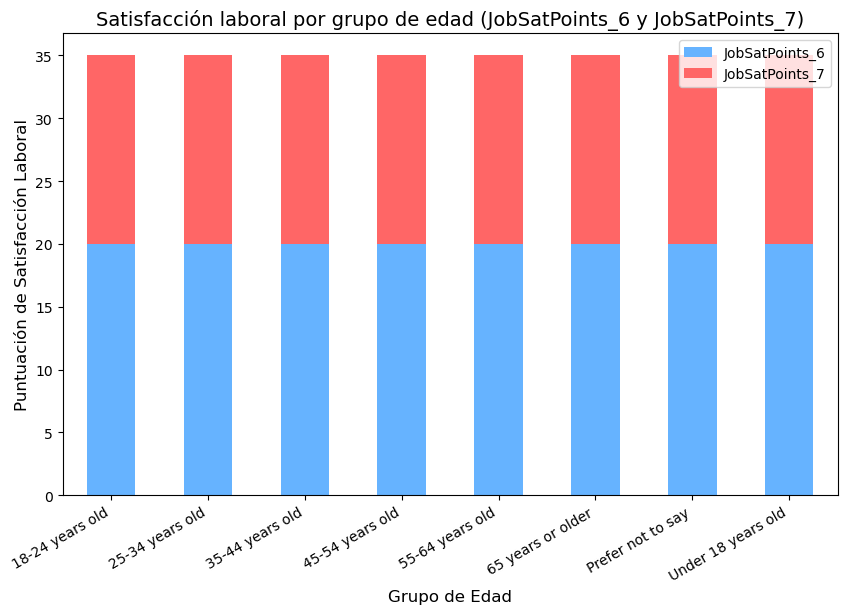

In [210]:
# Agrupar los datos por 'Age' y calcular la mediana de las puntuaciones de satisfacción laboral
age_grouped = df_copy.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Crear gráfico apilado
age_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ff6666'])

# Añadir título y etiquetas
plt.title('Satisfacción laboral por grupo de edad (JobSatPoints_6 y JobSatPoints_7)', fontsize=14)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Puntuación de Satisfacción Laboral', fontsize=12)

# Mostrar la gráfica
plt.xticks(rotation=30, ha='right')
plt.show()


In [211]:
### Tarea 133: Gráfica apilada de JobSatPoints_6 y JobSatPoints_7 para la situación laboral

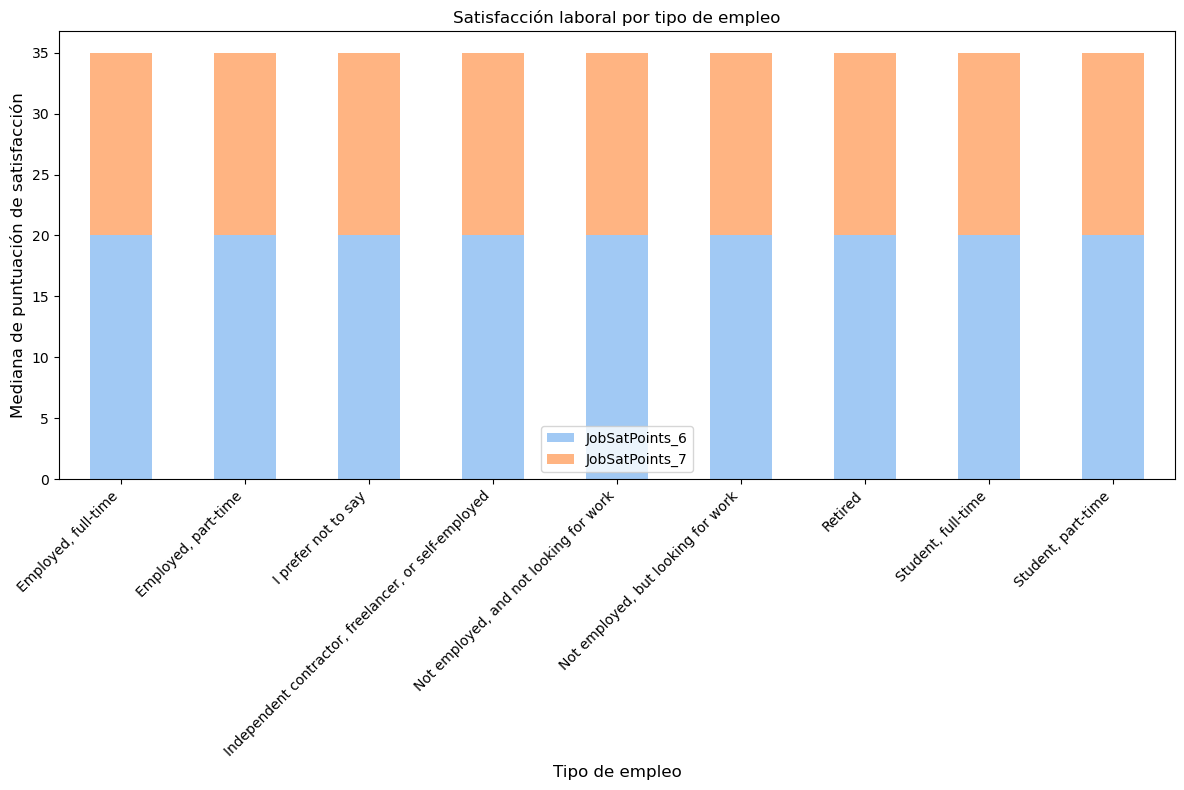

In [215]:
# 1: Gráfico apilado de satisfacción laboral por tipo de
# Agrupar por tipo de empleo y calcular la mediana de las puntuaciones
employment_grouped = df_copy.groupby('Employment_Label')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Crear gráfico apilado
employment_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#a1c9f4', '#ffb482'])

# Personalizar el gráfico
plt.title('Satisfacción laboral por tipo de empleo', fontsize=12)
plt.xlabel('Tipo de empleo', fontsize=12)
plt.ylabel('Mediana de puntuación de satisfacción', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


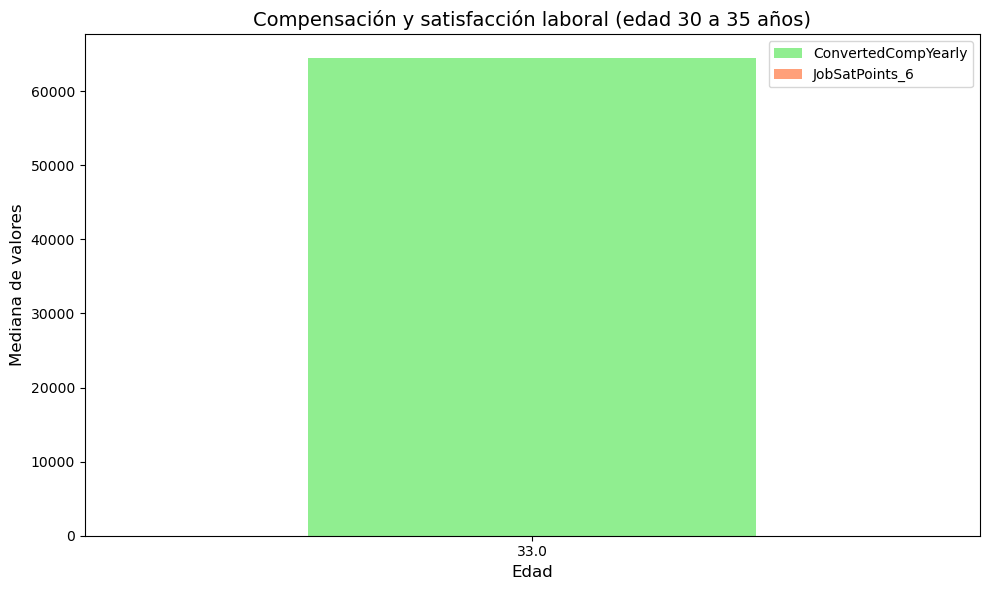

In [216]:
# 2: Gráfico apilado de compensación y satisfacción (30-35 años)
# Filtrar por edades entre 30 y 35 años
filtered_df = df_copy[(df_copy['AgeNum'] >= 30) & (df_copy['AgeNum'] <= 35)]

# Agrupar por edad exacta para comparar compensación y satisfacción
age_grouped = filtered_df.groupby('AgeNum')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Crear gráfico apilado
age_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#90ee90', '#ffa07a'])

# Personalizar el gráfico
plt.title('Compensación y satisfacción laboral (edad 30 a 35 años)', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Mediana de valores', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [217]:
### Tarea 134: Compare las métricas de compensación mediana y satisfacción laboral en diferentes grupos de edad

C:\Users\valki\AppData\Local\Temp\ipykernel_30928\2616827824.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(grouped.index, rotation=45, ha='right')


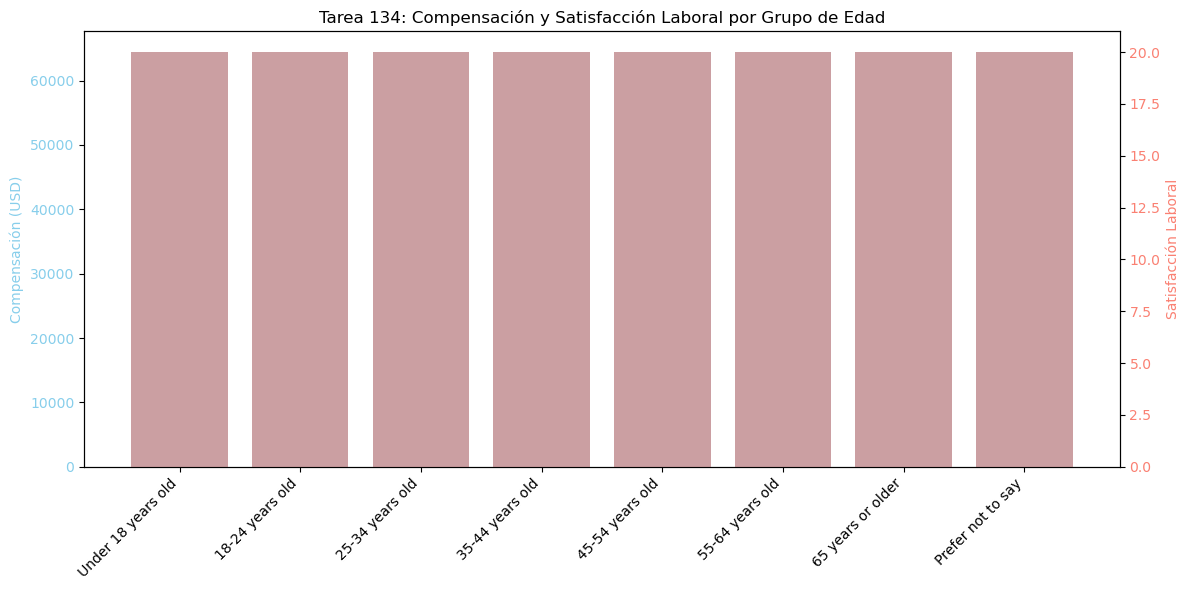

In [225]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos
grouped = df_copy.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Ordenar edades para mejor visualización
orden_edades = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]
grouped = grouped.loc[orden_edades]

# Crear gráfico con dos ejes Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primer eje Y para compensación
ax1.bar(grouped.index, grouped['ConvertedCompYearly'], color='skyblue', label='Compensación Anual')
ax1.set_ylabel('Compensación (USD)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(grouped.index, rotation=45, ha='right')

# Segundo eje Y para satisfacción laboral
ax2 = ax1.twinx()
ax2.bar(grouped.index, grouped['JobSatPoints_6'], color='salmon', alpha=0.6, label='Satisfacción Laboral')
ax2.set_ylabel('Satisfacción Laboral', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# Título y leyenda
plt.title('Tarea 134: Compensación y Satisfacción Laboral por Grupo de Edad')
fig.tight_layout()
plt.show()


In [226]:
### Tarea 135: Gráfico apilado de bases de datos preferidas por grupo de edad

C:\Users\valki\AppData\Local\Temp\ipykernel_30928\3371687585.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  database_grouped = databases_exploded.groupby(['AgeGroup', 'Databases']).size().reset_index(name='Frequency')


<Figure size 1600x1000 with 0 Axes>

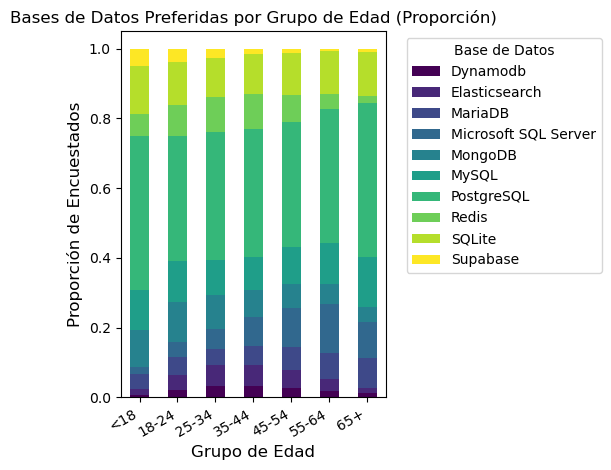

In [245]:

# Limpiar filas con valores nulos en las columnas relevantes
df_copy = df_copy.dropna(subset=['DatabaseWantToWorkWith', 'AgeNum'])

# Definir los rangos de edad y las etiquetas para los grupos de edad
bins = [0, 18, 24, 34, 44, 54, 64, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_copy['AgeGroup'] = pd.cut(df_copy['AgeNum'], bins=bins, labels=labels, right=False)

# Dividir la columna de bases de datos preferidas en listas
df_copy['Databases'] = df_copy['DatabaseWantToWorkWith'].str.split(';')

# Explode las bases de datos
databases_exploded = df_copy.explode('Databases')
databases_exploded['Databases'] = databases_exploded['Databases'].str.strip()

# Agrupar por grupo de edad y base de datos, y contar la frecuencia
database_grouped = databases_exploded.groupby(['AgeGroup', 'Databases']).size().reset_index(name='Frequency')

# Calcular la frecuencia total de cada base de datos para seleccionar las principales
top_n = 10  # Seleccionar las 10 bases de datos más populares
top_databases = database_grouped.groupby('Databases')['Frequency'].sum().nlargest(top_n).index
database_grouped_top = database_grouped[database_grouped['Databases'].isin(top_databases)]

# Pivotear los datos para el gráfico apilado
database_pivot = database_grouped_top.pivot_table(index='AgeGroup', columns='Databases', values='Frequency', fill_value=0)

# Calcular la proporción de cada base de datos por grupo de edad
database_proportion = database_pivot.apply(lambda x: x / x.sum(), axis=1)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(16, 10))
database_proportion.plot(kind='bar', stacked=True, colormap='viridis')

# Mejorar la visualización
plt.title('Bases de Datos Preferidas por Grupo de Edad (Proporción)', fontsize=12)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Proporción de Encuestados', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Base de Datos', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout(rect=[0, 0, 0.9, 1]) # Ajustar espacio para la leyenda
plt.show()

In [246]:
### Tarea 136: Gráfico apilado de tipo de empleo por satisfacción laboral

C:\Users\valki\AppData\Local\Temp\ipykernel_30928\979115927.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_sat_grouped = df_copy.groupby(['JobSatGroup', 'DevType']).size().unstack(fill_value=0)


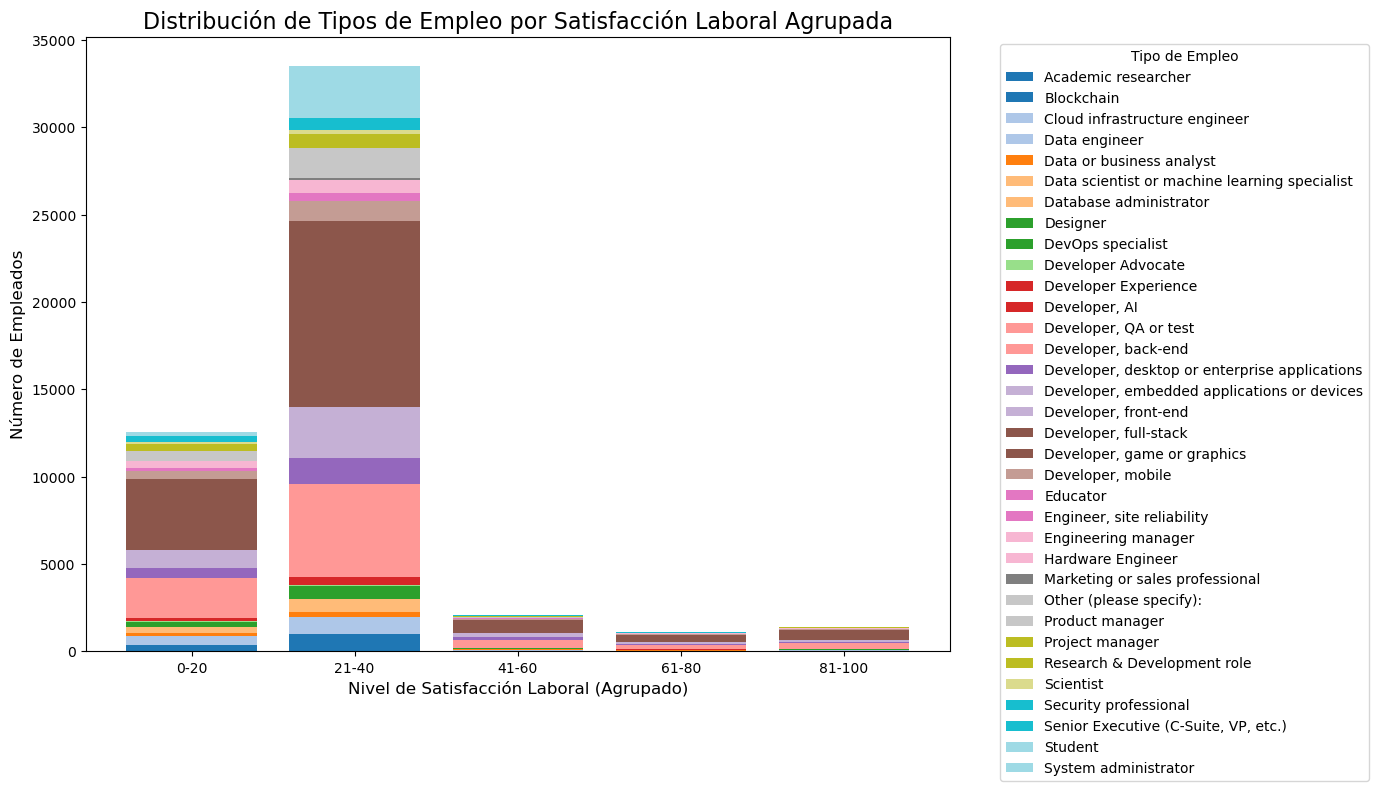

In [255]:
# Agrupamos por satisfacción laboral y tipo de empleo
job_sat_dev_type_counts = df_copy.groupby(['JobSatPoints_6', 'DevType']).size().unstack(fill_value=0)

# Definir los rangos para agrupar la satisfacción laboral
bins = [0, 20, 40, 60, 80, 100]  # Ejemplo de rangos
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Crear una nueva columna con los grupos de satisfacción laboral
df_copy['JobSatGroup'] = pd.cut(df_copy['JobSatPoints_6'], bins=bins, labels=labels, right=False)

# Agrupar por el nuevo grupo de satisfacción laboral y tipo de empleo
job_sat_grouped = df_copy.groupby(['JobSatGroup', 'DevType']).size().unstack(fill_value=0)

# Creamos el gráfico apilado
ax = job_sat_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20', width=0.8)

# Títulos y etiquetas
plt.title('Distribución de Tipos de Empleo por Satisfacción Laboral Agrupada', fontsize=16)
plt.xlabel('Nivel de Satisfacción Laboral (Agrupado)', fontsize=12)
plt.ylabel('Número de Empleados', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.legend(title='Tipo de Empleo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [256]:
### Tarea 137: Gráfico Apilado de Lenguajes de Programación Preferidos por Grupo de Edad

C:\Users\valki\AppData\Local\Temp\ipykernel_30928\3146388980.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  language_grouped = languages_exploded.groupby(['AgeGroup', 'AdmiredLanguages']).size().reset_index(name='Frequency')


<Figure size 1200x800 with 0 Axes>

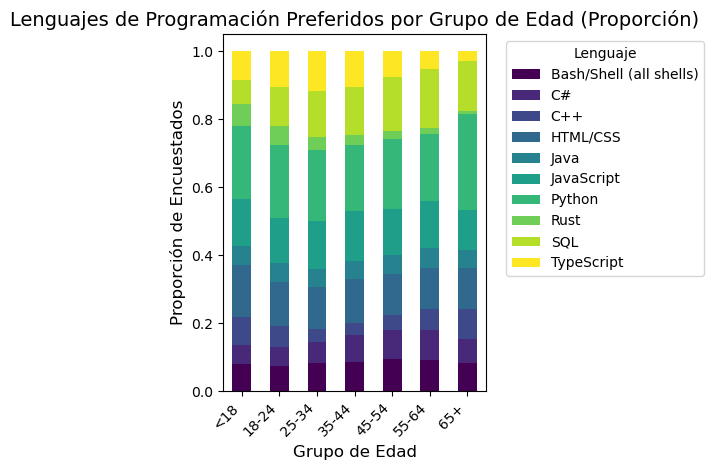

In [260]:
# Definir los rangos de edad y las etiquetas para los grupos de edad
bins = [0, 18, 24, 34, 44, 54, 64, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_copy['AgeGroup'] = pd.cut(df_copy['AgeNum'], bins=bins, labels=labels, right=False)

# Dividir la columna de lenguajes admirados en listas
df_copy['AdmiredLanguages'] = df_copy['LanguageAdmired'].str.split(';')

# Explode los lenguajes admirados
languages_exploded = df_copy.explode('AdmiredLanguages')
languages_exploded['AdmiredLanguages'] = languages_exploded['AdmiredLanguages'].str.strip()

# Agrupar por grupo de edad y lenguaje admirado, y contar la frecuencia
language_grouped = languages_exploded.groupby(['AgeGroup', 'AdmiredLanguages']).size().reset_index(name='Frequency')

# Calcular la frecuencia total de cada lenguaje para seleccionar los principales
top_n = 10  # Seleccionar los 10 lenguajes más admirados
top_languages = language_grouped.groupby('AdmiredLanguages')['Frequency'].sum().nlargest(top_n).index
language_grouped_top = language_grouped[language_grouped['AdmiredLanguages'].isin(top_languages)]

# Pivotear los datos para el gráfico apilado
language_pivot = language_grouped_top.pivot_table(index='AgeGroup', columns='AdmiredLanguages', values='Frequency', fill_value=0)

# Calcular la proporción de cada lenguaje por grupo de edad
language_proportion = language_pivot.apply(lambda x: x / x.sum(), axis=1)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
language_proportion.plot(kind='bar', stacked=True, colormap='viridis')

# Mejorar la visualización
plt.title('Lenguajes de Programación Preferidos por Grupo de Edad (Proporción)', fontsize=14)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Proporción de Encuestados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lenguaje', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout(rect=[0, 0, 0.9, 1]) # Ajustar espacio para la leyenda
plt.show()

In [262]:
### Tarea 138: Gráfico Apilado de Adopción de Tecnología por Tipo de Empleo

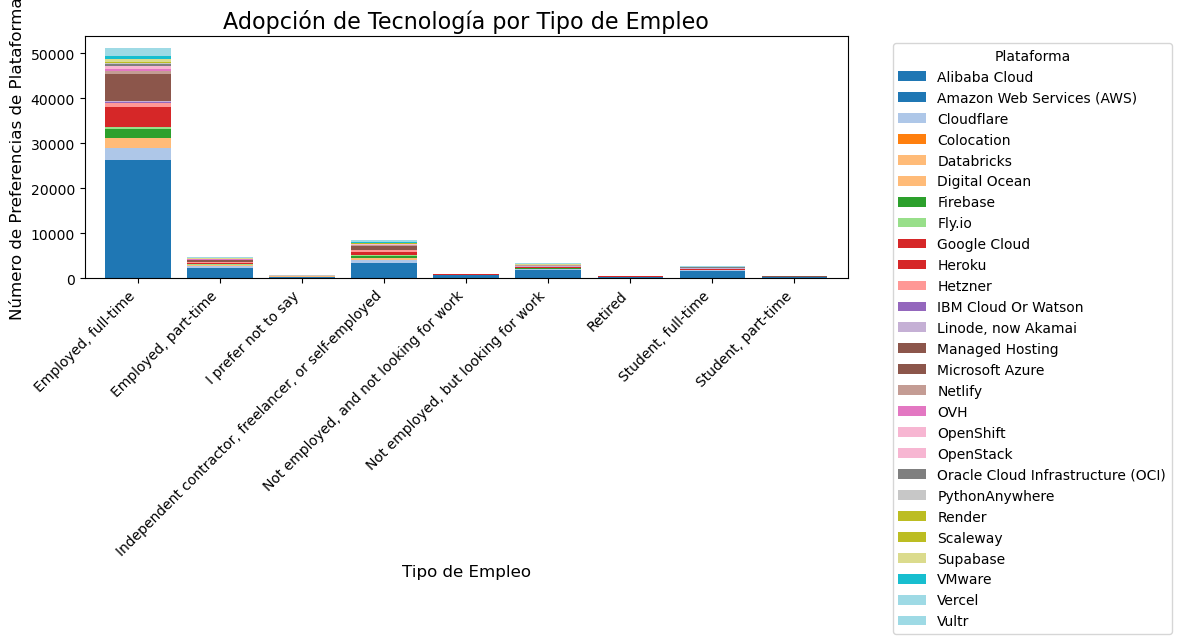

In [266]:
import pandas as pd
import matplotlib.pyplot as plt

# Dividir la columna 'PlatformAdmired' por el separador ';' y convertir a formato largo
platforms = df_copy['PlatformAdmired'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Convertimos en DataFrame
platforms = platforms.to_frame(name='PlatformAdmired')

# Asociamos las plataformas con el tipo de empleo
platforms['Employment_Label'] = df_copy['Employment_Label'].repeat(platforms.groupby(level=0).size())

# Contamos las plataformas preferidas por cada tipo de empleo
platform_counts = platforms.groupby(['Employment_Label', 'PlatformAdmired']).size().unstack(fill_value=0)

# Creamos el gráfico apilado
ax = platform_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20', width=0.8)

# Títulos y etiquetas
plt.title('Adopción de Tecnología por Tipo de Empleo', fontsize=16)
plt.xlabel('Tipo de Empleo', fontsize=12)
plt.ylabel('Número de Preferencias de Plataforma', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [267]:
### Laboratorios 18 - Gráficos de líneas para Tendencias en la compensación por grupos de edad

In [268]:
### Tarea 139: Gráfico de líneas de la compensación anual mediana convertida por grupo de edad

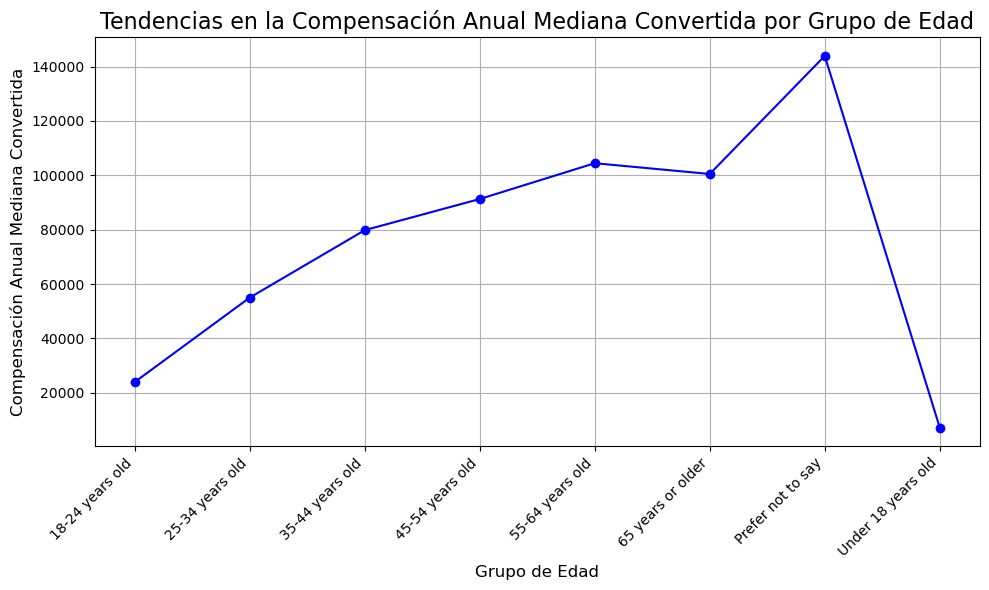

In [270]:
# Excluir los registros con la compensación anual igual a la mediana imputada
df_filtered = df_copy[df_copy['ConvertedCompYearly'] != 64444.0]

# Calcular la mediana de la compensación anual convertida por grupo de edad
median_compensation_by_age = df_filtered.groupby('Age')['ConvertedCompYearly'].median()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(median_compensation_by_age.index, median_compensation_by_age.values, marker='o', linestyle='-', color='b')

# Títulos y etiquetas
plt.title('Tendencias en la Compensación Anual Mediana Convertida por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Compensación Anual Mediana Convertida', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [271]:
### Tarea 140: Gráfico de líneas de la compensación anual mediana convertida para las edades de 25 a 45 años

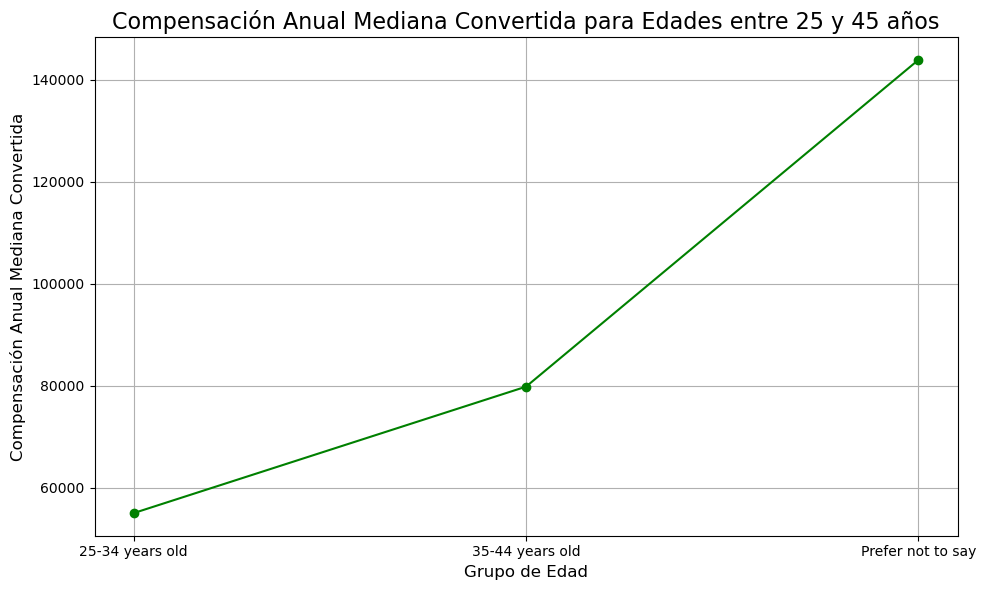

In [292]:
# Filtrar los datos para obtener solo los registros de edades entre 25 y 45 años
df_filtered_age = df_copy[(df_copy['AgeNum'] >= 25) & (df_copy['AgeNum'] <= 45)]

# Excluir los registros con la compensación anual igual a la mediana imputada
df_filtered_age = df_filtered_age[df_filtered_age['ConvertedCompYearly'] != 64444.0]

# Calcular la mediana de la compensación anual convertida por grupo de edad
median_compensation_by_age = df_filtered_age.groupby('Age')['ConvertedCompYearly'].median()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(median_compensation_by_age.index, median_compensation_by_age.values, marker='o', linestyle='-', color='g')

# Títulos y etiquetas
plt.title('Compensación Anual Mediana Convertida para Edades entre 25 y 45 años', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Compensación Anual Mediana Convertida', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [275]:
### Tarea 141: Gráfico de líneas de satisfacción laboral (JobSatPoints_6) por nivel de experiencia

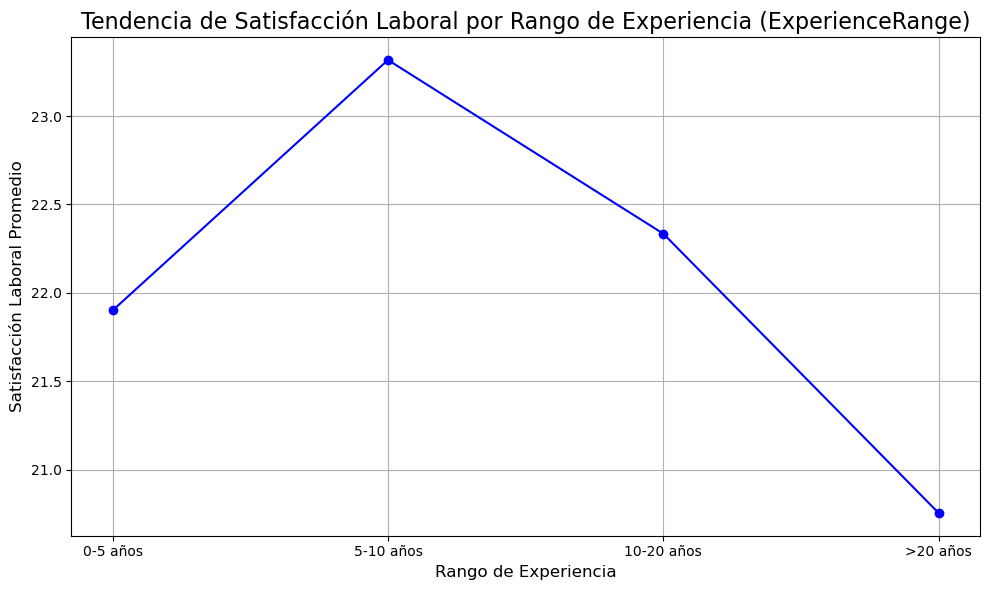

In [291]:
# Excluir los valores imputados para JobSatPoints_6 si es necesario
df_filtered_experience_range = df_copy.dropna(subset=['JobSatPoints_6'])

# Calcular la media de la satisfacción laboral por rango de experiencia
experience_range_satisfaction = df_filtered_experience_range.groupby('ExperienceRange')['JobSatPoints_6'].mean()

# Ordenar los rangos de experiencia de manera numérica
experience_range_order = ['0-5 años', '5-10 años', '10-20 años', '>20 años']
experience_range_satisfaction = experience_range_satisfaction[experience_range_order]

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(experience_range_satisfaction.index, experience_range_satisfaction.values, marker='o', linestyle='-', color='b')

# Títulos y etiquetas
plt.title('Tendencia de Satisfacción Laboral por Rango de Experiencia (ExperienceRange)', fontsize=16)
plt.xlabel('Rango de Experiencia', fontsize=12)
plt.ylabel('Satisfacción Laboral Promedio', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [282]:
### Tarea 142: Gráfico de Líneas de la Mediana de la Remuneración Anual Convertida según el Nivel de Experiencia

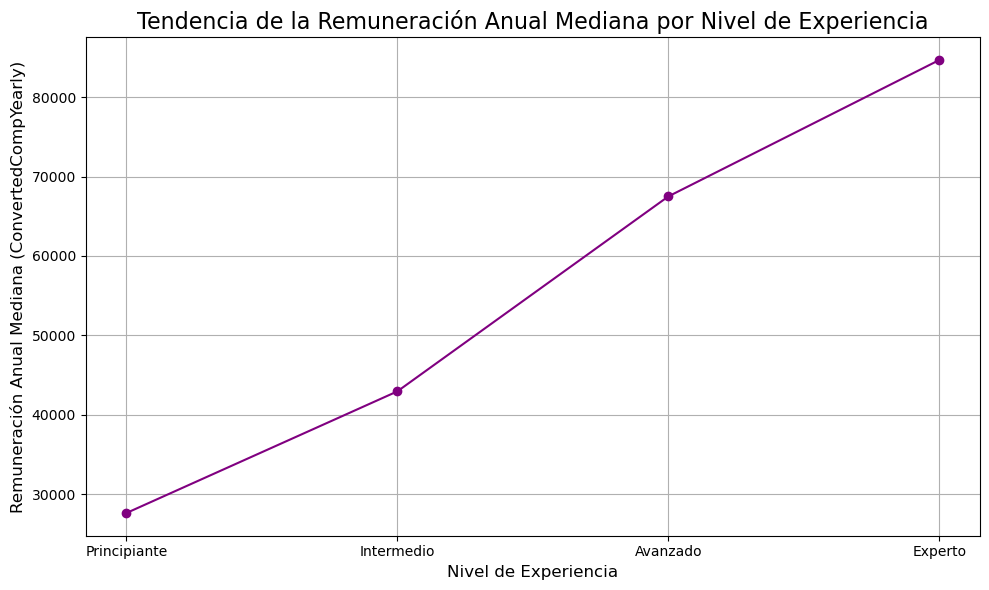

In [290]:
# Excluir los registros con la compensación anual igual a la mediana imputada
df_filtered_experience_level = df_copy[df_copy['ConvertedCompYearly'] != 64444.0]
# Calcular la mediana de la remuneración anual por nivel de experiencia
experience_level_salary = df_filtered_experience_level.groupby('ExperienceLevel')['ConvertedCompYearly'].median()

# Ordenar los niveles de experiencia
experience_level_order = ['Principiante', 'Intermedio', 'Avanzado', 'Experto']
experience_level_salary = experience_level_salary[experience_level_order]

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(experience_level_salary.index, experience_level_salary.values, marker='o', linestyle='-', color='purple')

# Títulos y etiquetas
plt.title('Tendencia de la Remuneración Anual Mediana por Nivel de Experiencia', fontsize=16)
plt.xlabel('Nivel de Experiencia', fontsize=12)
plt.ylabel('Remuneración Anual Mediana (ConvertedCompYearly)', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [286]:
### Tarea 143: Gráfico de Líneas de la Satisfacción Laboral (JobSatPoints_6) según el Nivel de Experiencia

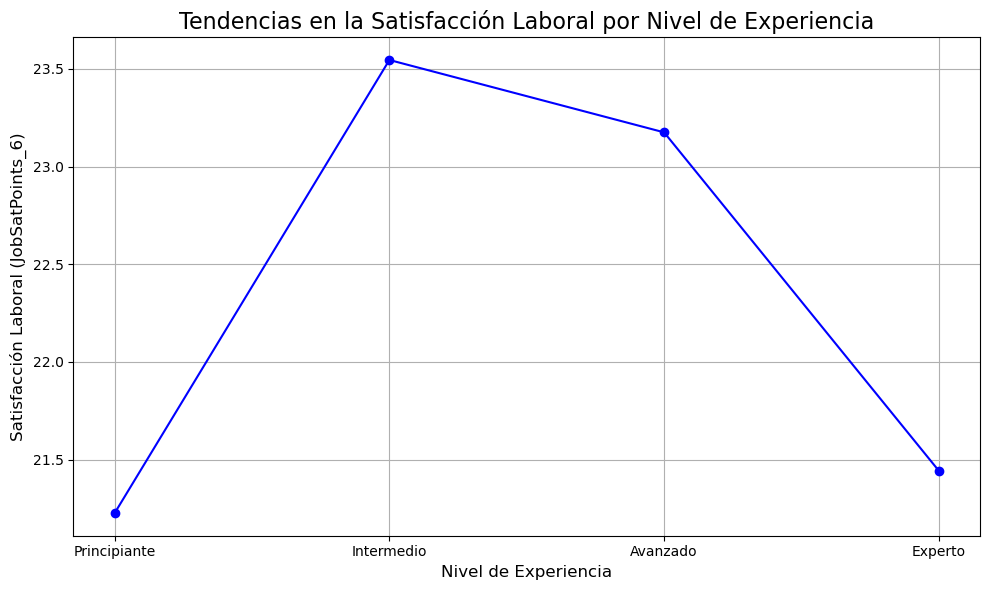

In [289]:
# Excluir los valores imputados de satisfacción laboral
df_filtered_job_sat = df_copy.dropna(subset=['JobSatPoints_6'])

# Calcular la media de la satisfacción laboral por nivel de experiencia
experience_level_satisfaction = df_filtered_job_sat.groupby('ExperienceLevel')['JobSatPoints_6'].mean()

# Ordenar los niveles de experiencia
experience_level_order = ['Principiante', 'Intermedio', 'Avanzado', 'Experto']
experience_level_satisfaction = experience_level_satisfaction[experience_level_order]

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(experience_level_satisfaction.index, experience_level_satisfaction.values, marker='o', linestyle='-', color='blue')

# Títulos y etiquetas
plt.title('Tendencias en la Satisfacción Laboral por Nivel de Experiencia', fontsize=16)
plt.xlabel('Nivel de Experiencia', fontsize=12)
plt.ylabel('Satisfacción Laboral (JobSatPoints_6)', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [293]:
### Laboratorios 19 - Gráficos de barras para Visualización de distribuciones de datos

In [294]:
### Tarea 144: Histograma de ConvertedCompYearly

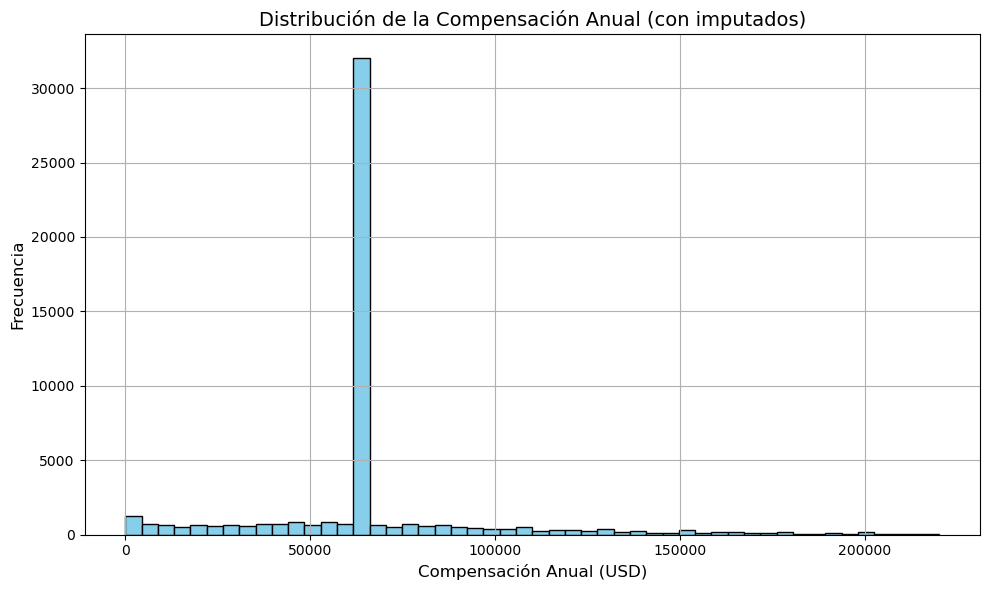

In [298]:
# Filtramos los valores nulos
comp_data = df_copy['ConvertedCompYearly']

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(comp_data, bins=50, color='skyblue', edgecolor='black')

# Títulos y etiquetas
plt.title('Distribución de la Compensación Anual (con imputados)', fontsize=14)
plt.xlabel('Compensación Anual (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\valki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


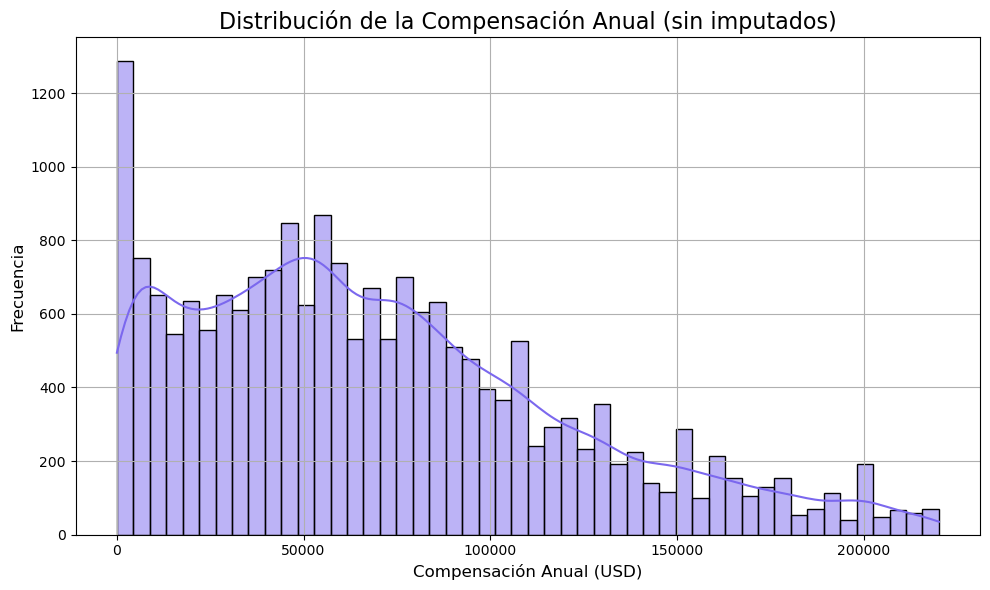

In [297]:
# Definir la mediana usada para imputar
mediana_imputada = 64444.0

# Filtramos los datos: eliminamos nulos y los valores imputados con la mediana
comp_data = df_copy['ConvertedCompYearly']
comp_data_filtrada = comp_data[(~comp_data.isna()) & (comp_data != mediana_imputada)]

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(comp_data_filtrada, bins=50, kde=True, color='mediumslateblue')

plt.title('Distribución de la Compensación Anual (sin imputados)', fontsize=16)
plt.xlabel('Compensación Anual (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [299]:
### Tarea 145: Diagrama de caja de edad

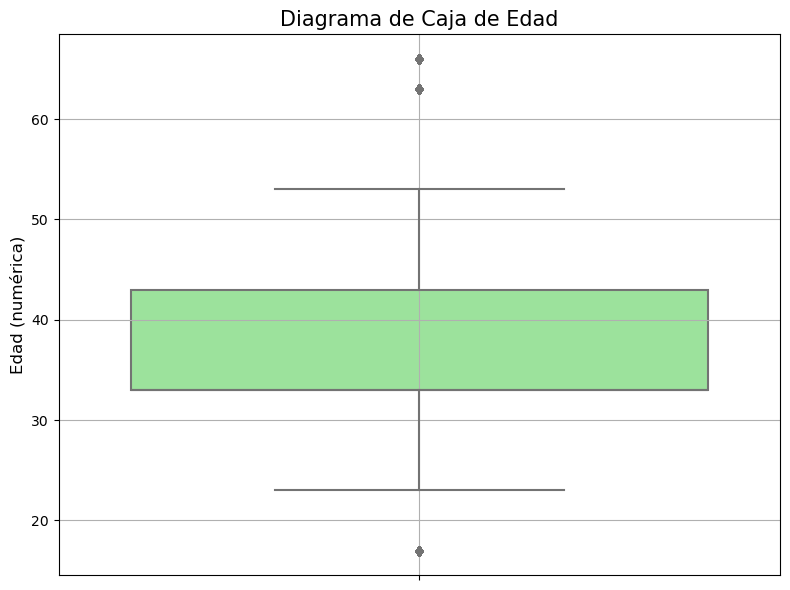

In [300]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_copy['AgeNum'], color='lightgreen')

plt.title('Diagrama de Caja de Edad', fontsize=15)
plt.ylabel('Edad (numérica)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [301]:
### Tarea 146: Diagrama de dispersión de Age_numeric y ConvertedCompYearly

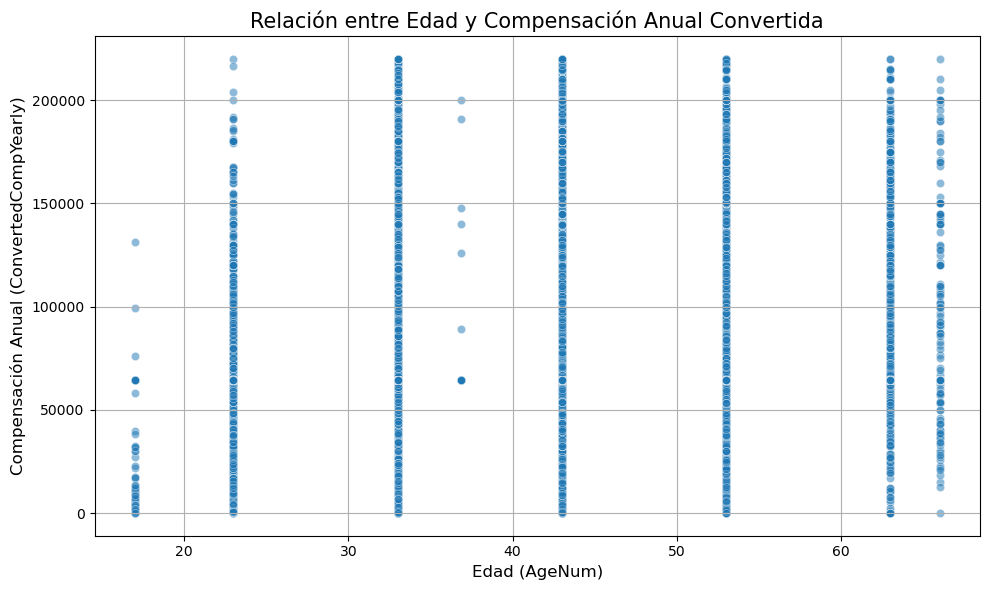

In [302]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AgeNum', y='ConvertedCompYearly', data=df_copy, alpha=0.5)

plt.title('Relación entre Edad y Compensación Anual Convertida', fontsize=15)
plt.xlabel('Edad (AgeNum)', fontsize=12)
plt.ylabel('Compensación Anual (ConvertedCompYearly)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [304]:
### Tarea 147: Diagrama de burbujas de ConvertedCompYearly y JobSatPoints_6 con Age_numeric como tamaño de burbuja

C:\Users\valki\AppData\Local\Temp\ipykernel_30928\2765693621.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


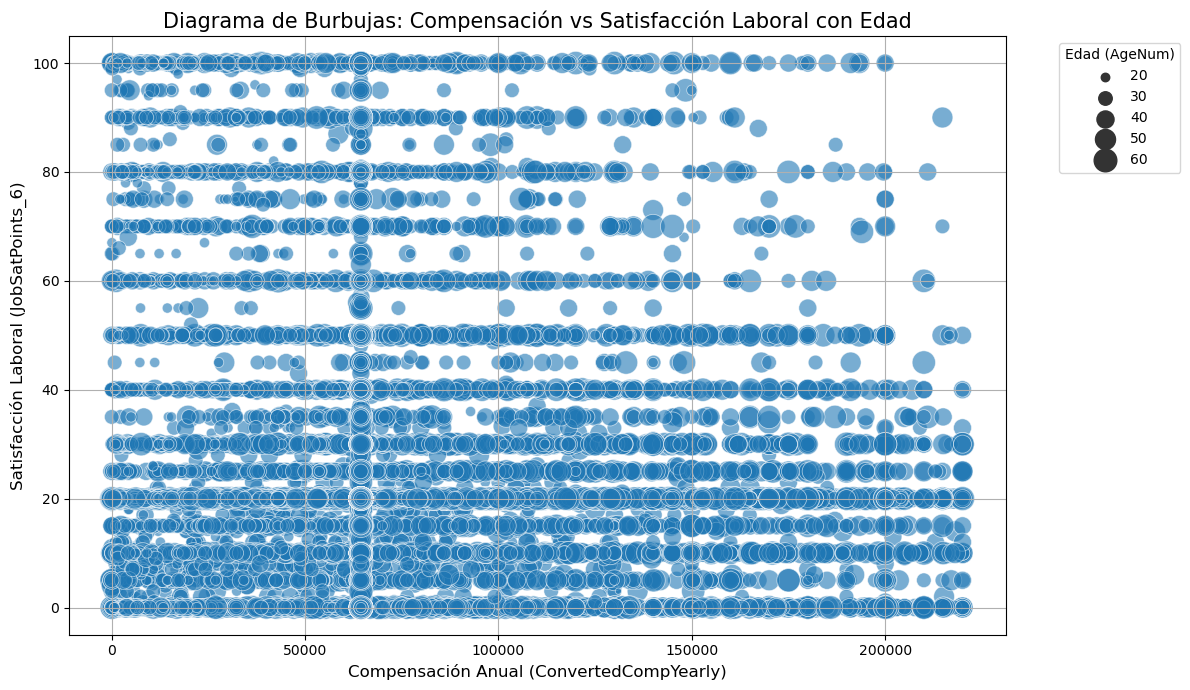

In [305]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_copy,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    size='AgeNum',
    sizes=(20, 300),  # Escala de tamaño de burbujas
    alpha=0.6,
    palette='viridis'
)

plt.title('Diagrama de Burbujas: Compensación vs Satisfacción Laboral con Edad', fontsize=15)
plt.xlabel('Compensación Anual (ConvertedCompYearly)', fontsize=12)
plt.ylabel('Satisfacción Laboral (JobSatPoints_6)', fontsize=12)
plt.legend(title='Edad (AgeNum)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [307]:
### Tarea 148: Gráfico de barras horizontales de la distribución de la rama principal

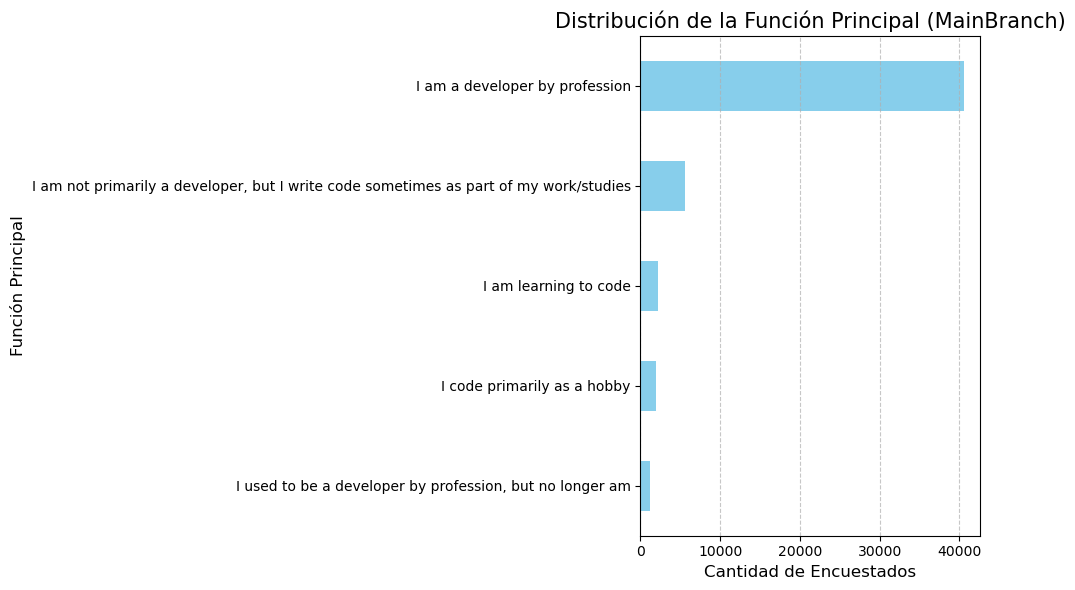

In [308]:
plt.figure(figsize=(10, 6))
df_copy['MainBranch'].value_counts().sort_values().plot(kind='barh', color='skyblue')

plt.title('Distribución de la Función Principal (MainBranch)', fontsize=15)
plt.xlabel('Cantidad de Encuestados', fontsize=12)
plt.ylabel('Función Principal', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [309]:
### Tarea 149: Gráfico de barras verticales de los 5 lenguajes de programación más populares para los encuestados

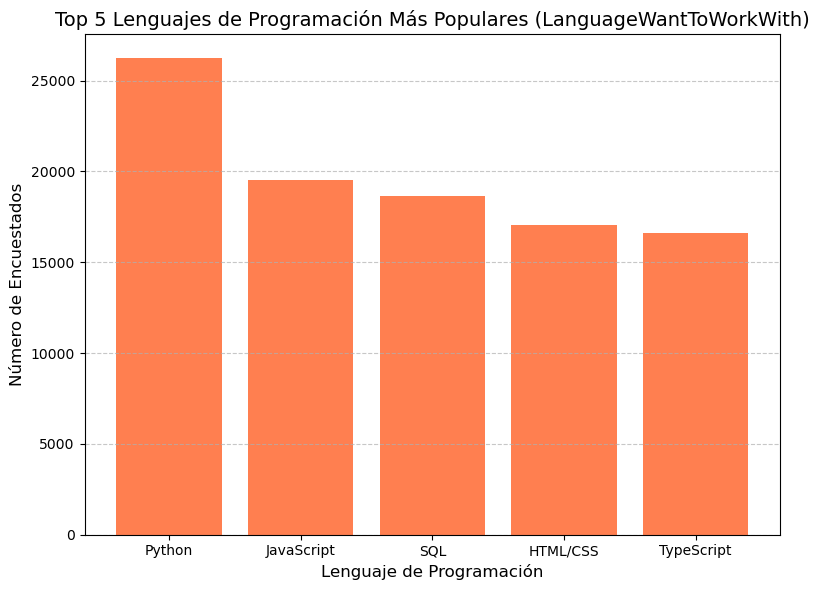

In [310]:
from collections import Counter

# Eliminar valores nulos
languages = df_copy['LanguageWantToWorkWith'].dropna()

# Dividir por ';' y aplanar la lista
all_languages = [lang.strip() for sublist in languages.str.split(';') for lang in sublist]

# Contar frecuencia
language_counts = Counter(all_languages)

# Seleccionar los 5 más comunes
top_5 = language_counts.most_common(5)

# Separar en etiquetas y valores
labels, values = zip(*top_5)

# Graficar
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='coral')

plt.title('Top 5 Lenguajes de Programación Más Populares (LanguageWantToWorkWith)', fontsize=14)
plt.ylabel('Número de Encuestados', fontsize=12)
plt.xlabel('Lenguaje de Programación', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [311]:
### Tarea 150: Gráfico de barras apiladas de la mediana de JobSatPoints_6 y JobSatPoints_7 por grupo de edad

C:\Users\valki\AppData\Local\Temp\ipykernel_30928\2375399393.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_grouped = df_copy.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()


<Figure size 1000x600 with 0 Axes>

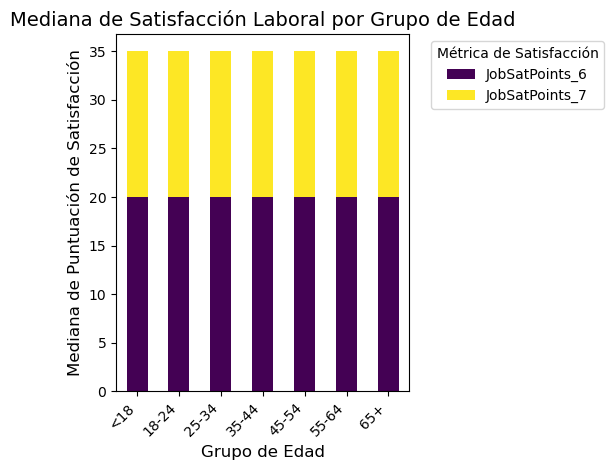

In [314]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear la columna de grupos de edad si no existe
if 'AgeGroup' not in df_copy.columns:
    bins = [0, 18, 24, 34, 44, 54, 64, 100]
    labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
    df_copy['AgeGroup'] = pd.cut(df_copy['AgeNum'], bins=bins, labels=labels, right=False)

# Agrupar por grupo de edad y calcular la mediana de las puntuaciones de satisfacción
satisfaction_grouped = df_copy.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Ordenar los grupos de edad para una mejor visualización
orden_edades = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
satisfaction_grouped = satisfaction_grouped.reindex(orden_edades)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
satisfaction_grouped.plot(kind='bar', stacked=True, colormap='viridis')

# Mejorar la visualización
plt.title('Mediana de Satisfacción Laboral por Grupo de Edad', fontsize=14)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Mediana de Puntuación de Satisfacción', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Métrica de Satisfacción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.9, 1]) # Ajustar espacio para la leyenda
plt.show()

In [315]:
### Tarea 151: Gráfico de barras de popularidad de bases de datos (DatabaseHaveWorkedWith)

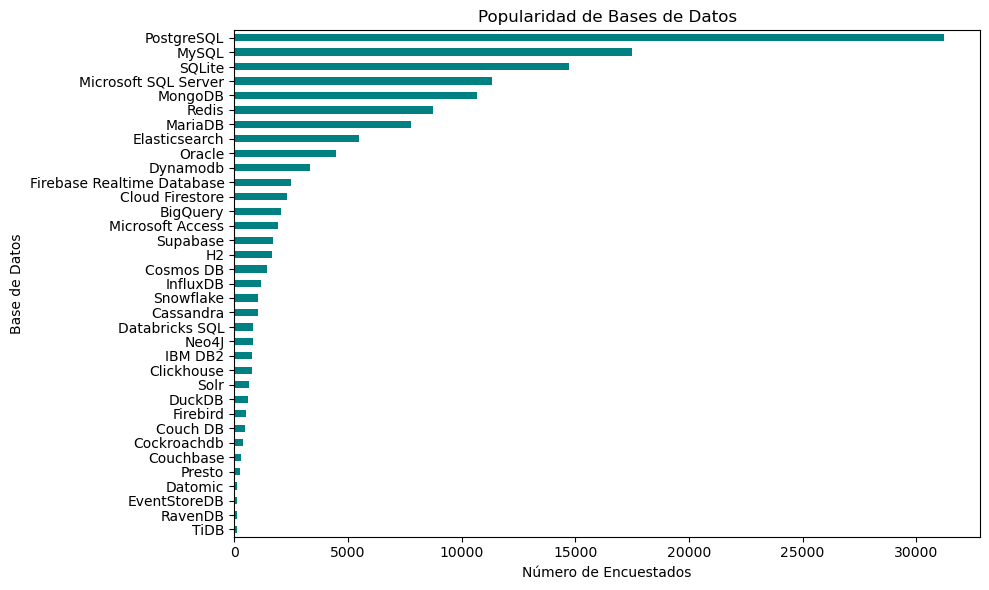

In [316]:
import pandas as pd
import matplotlib.pyplot as plt

# Separar los valores múltiples (si están separados por punto y coma) y convertir en formato largo
db_series = df_copy['DatabaseHaveWorkedWith'].str.split(';').explode()

# Contar la frecuencia de cada base de datos
db_counts = db_series.value_counts().sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
db_counts.plot(kind='barh', color='teal')
plt.title('Popularidad de Bases de Datos')
plt.xlabel('Número de Encuestados')
plt.ylabel('Base de Datos')
plt.tight_layout()
plt.show()


In [317]:
### Tarea 152: Gráfico de barras agrupado de la mediana de la compensación anual convertida para diferentes grupos de edad

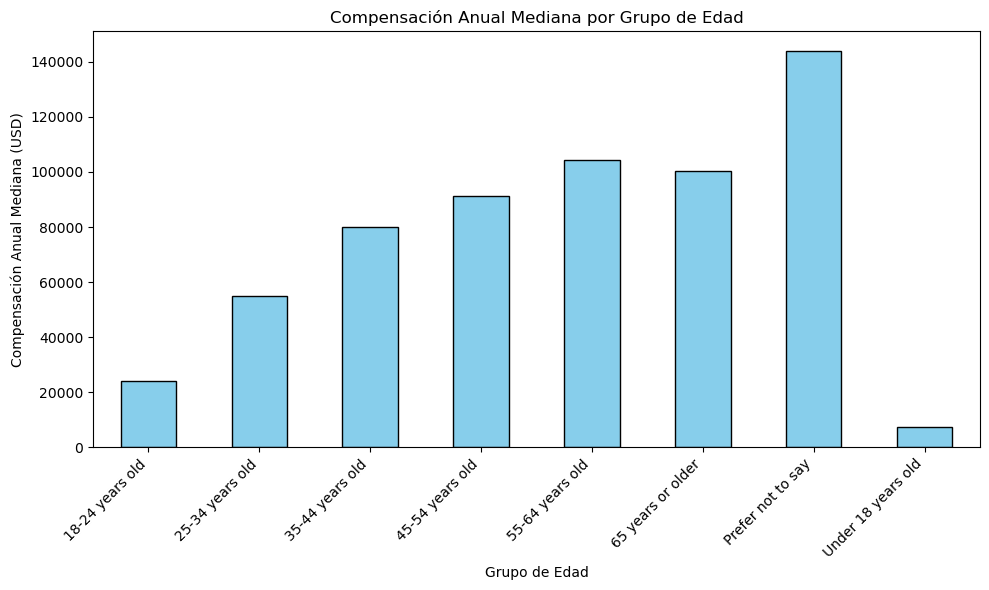

In [320]:
# Filtrar los datos quitando los valores imputados si fuera necesario
# Aquí asumimos que los valores imputados tienen el valor exacto de la mediana imputada
mediana_imputada = 64444.0
df_filtered = df_copy[df_copy['ConvertedCompYearly'] != mediana_imputada]

# Agrupar por grupo de edad y calcular la mediana de compensación
median_comp_by_age = df_filtered.groupby('Age')['ConvertedCompYearly'].median().sort_index()

# Crear el gráfico de barras agrupado (en este caso, cada grupo es una barra)
plt.figure(figsize=(10, 6))
median_comp_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Compensación Anual Mediana por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Compensación Anual Mediana (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [321]:
### Tarea 153: Gráfico de barras del número de encuestados por país

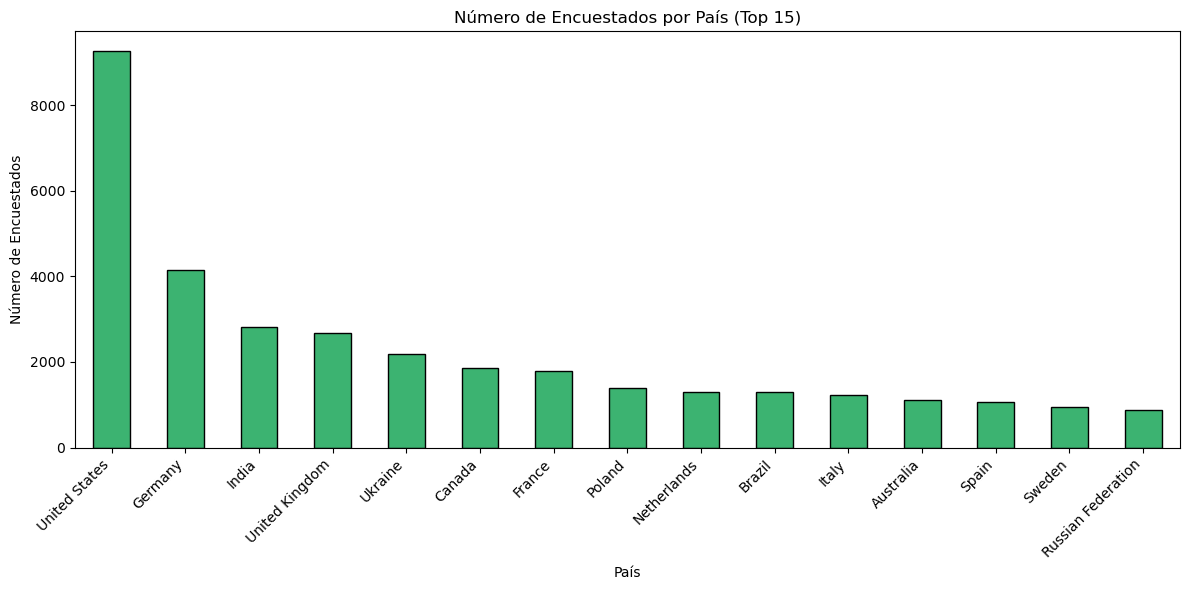

In [322]:
# Contar la cantidad de encuestados por país
country_counts = df_copy['Country'].value_counts().sort_values(ascending=False)

# Mostrar solo los 15 países con más encuestados (opcional)
top_countries = country_counts.head(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Número de Encuestados por País (Top 15)')
plt.xlabel('País')
plt.ylabel('Número de Encuestados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
